### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [2]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [3]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\May_2022\climate_df_May22.pkl")

In [3]:
df.head(100)

tweet_id                                 hashtags  \
613    1520915462376230912                                       []   
668    1520915413361733632                                       []   
1112   1520915000356970496                                       []   
1474   1520914674308444160                                       []   
1844   1520914351234121728                                       []   
2359   1520913914808180738                                       []   
4005   1520912472470917125                                       []   
4110   1520912361133068288                                       []   
5888   1520910693725310978                                       []   
6193   1520910431233396737                                       []   
6322   1520910316452085760                                       []   
6470   1520910188680998912                                       []   
6814   1520909866520690689                                       []   
7116   1520909575934906369                                       []   
7416   1520909305150595073                                       []   
7545   1520909177966628864                                       []   
7595   1520909126695591942                                       []   
7790   1520908959552765952                                       []   
7877   1520908887666225152                                       []   
8043   1520908726835634176                                       []   
8424   1520908371263889408                                       []   
8552   1520908253047271424                                       []   
8884   1520907943457472513                     [VoteThemAllOut2022]   
9024   1520907817343152128                                       []   
9728   1520907237664837632                                       []   
9777   1520907193498931202                                       []   
11049  1520906115315384321                                       []   
11384  1520905828743757827                                       []   
11591  1520905659692294146                                       []   
11831  1520905424492691456                                       []   
11844  1520905414283771904                                       []   
11848  1520905409720164352                                       []   
12700  1520904637687091200                                       []   
15212  1520902437493944320                                       []   
15214  1520902432993480704                                       []   
16045  1520901707685036032                                       []   
16629  1520901181538959360                                       []   
16661  1520901158612611072                                       []   
16728  1520901100576063490                                       []   
18054  1520899996266024961                                       []   
18683  1520899466772975616                                       []   
18871  1520899307288907778                                       []   
19541  1520898740608937985                                       []   
20144  1520898270628769793                                       []   
20879  1520897657795133440                                       []   
21557  1520897083829813250                                       []   
21982  1520896711719538688                                       []   
22316  1520896434471682053                                       []   
24268  1520894758725423104                                       []   
26269  1520893104311742464                                       []   
26333  1520893035823116288                                       []   
27078  1520892358581420032                                       []   
27220  1520892235855785984                                       []   
27903  1520891617854595072                                       []   
28122  1520891420147535876                                       []   
29399  1520890289719681024                

# Number of tweets

In [4]:
print(f"{len(df)} texts loaded.")

400491 texts loaded.


# Replies

In [5]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'ClimateCrisis': 3918,
         'climatescience': 3430,
         'ClimateBrawl': 2684,
         'climate': 1670,
         'climatechange': 1430,
         'ClimateChange': 1372,
         'disinformation': 1088,
         'misinformation': 1040,
         'ClimateEmergency': 962,
         'Propaganda': 945,
         'Climate': 876,
         'propaganda': 756,
         'DefundTheBBC': 732,
         'ClimateAction': 549,
         'UN': 476,
         'GlobalWarming': 456,
         'monkeypox': 448,
         'UFO': 438,
         'Disinformation': 394,
         'COVID19': 324,
         'Climate_Change': 308,
         'EndFossilFinance': 254,
         'SocialMedia': 252,
         'BigTech': 241,
         'auspol': 236,
         'PR': 230,
         'AI': 228,
         'Misinformation': 222,
         'ausvotes': 221,
         'climateaction': 218,
         'EarthDay': 205,
         'barry': 205,
         'globalwarminghoax': 203,
         'deforestation': 179,
         'quantum': 172,
   

In [6]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

ClimateCrisis
ClimateChange
ClimateHoax
climateaction
climatechange
Globalists
globalwarminghoax
GlobalWarming
Climate
ClimateBrawl
LNPClimateCriminals
EarthDay
ClimateActionScience
climatechangecult
ClimateClapTrap
climate
ClimateActionNow
ClimateCommunism
climatecrisis
ClimateEmergency
climatebrawl
ClimateAction
climatecult
Climate_Change
climateCrisis
EarthDay2022
CLIMATE
Climate200
ClimateKillers
ClimateReporting
ClimateCon
climatescientist
Globalwarming
ClimateCatastrophe
globalelites
ManMadeClimateChangeHoax
ClimateCult
ClimateGate
Climatebrawl
ClimateJustice
climatedenial
ClimateChangeHoax
ClimateScam
AntiClimateChange
ClimateHysteria
BizzarClimateCult
gLObaLwarming
PRCAClimateComms
climateemergency
climateSCAM
ActOnClimate
GlobalClimateJustice
ClimateScamsters
ClimateDaily
ClimateDenier
DailyClimate
RunawayGlobalHeatingExtinctionEmergency
Climatescam
climatehoax
climatenutter
climateliteracy
climatedisclosure
globalwarming
climatescience
climatechaos
climatedeniers
ClimateBS
Cl

In [7]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [8]:
df.user_name.value_counts()

Veritatem2021      2892
hendricxsantos     2146
drochir_thonnuk    1701
hassciencebot      1299
jannatuur1          895
Ceist8              755
rrrrrrrickrock      748
GeraldKutney        741
TyotoRiffle         721
FakeTrumpBot1       650
MikeDel21893959     631
AlexVickeryHowe     562
psnorac72           558
HmGinYYC            522
equalearth          486
Canadianworker2     478
tan123              446
Hakimi09966557      436
kattani2233         406
jhgage1             400
JimBowersclimb      396
cybernws            357
FriendsOScience     334
DawnTJ90            331
aNorthernGarden     327
IanHugh07940666     323
Greg_LW             320
Bob99292956         317
bvnt123             315
jbonbon91           314
DeanSmi47962704     301
psPetePatel7        297
rfeynmansBongos     282
Michael63746953     274
Allen04248687       274
boggywood           267
douglaslloyd5       256
peter_teese         241
HenryK_B_           239
IanDJbrown2         236
guitaruncle1        231
Eco1stArt       

# Searching in tweets

# Replies in climate

In [9]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

261395


139096

In [10]:
# 0.42% of the tweets were climate tweets from callout dataset
round(301_631/136_265_329 * 100,2)

0.22

# Unique tweets

In [11]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

13985 Unique Tweets


# Bag of words: Climate change

In [4]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [5]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

[':', 'wrote', 'whole', 'book', 'chapter', 'climate', 'disinformation', 'featuring', 'exxon', 'koch']


In [ ]:
climate_split = [word for word in climate_split if not word in stop_words]

In [7]:
print(climate_split[0:10])

[':', 'wrote', 'whole', 'book', 'chapter', 'climate', 'disinformation', 'featuring', 'exxon', 'koch']


In [16]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

In [17]:
pprint(bow_climate.most_common(20))

[('climate', 297465),
 ('propaganda', 133891),
 ('change', 118528),
 ('disinformation', 76734),
 ('misinformation', 55083),
 ('conspiracy', 54499),
 ('global', 47099),
 ('spread', 46929),
 ('warming', 42631),
 ('medium', 42564),
 ('make', 41172),
 ('people', 35945),
 ('abc', 32051),
 ('happy', 32010),
 ('bbc', 31736),
 ('like', 31524),
 ('correct', 31495),
 ('fake', 26287),
 ('death', 26220),
 ('news', 25037)]


# WordCloud

In [18]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_May_22.png")

# Count retweets

In [19]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

190475


# Ngrams: Climate

In [20]:
# print(processed_climate)

In [21]:
n = 1

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('climate',), 297465),
 (('propaganda',), 133891),
 (('change',), 118528),
 (('disinformation',), 76734),
 (('misinformation',), 55083),
 (('conspiracy',), 54499),
 (('global',), 47099),
 (('spread',), 46929),
 (('warming',), 42631),
 (('medium',), 42564)]

# Hashtag co-occurence


In [3]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [4]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#votethemallout2022', '#ipa', '#lnp'],
 ['#democracyish', '#gop', '#wokeaf'],
 ['#rabbithole',
  '#power',
  '#conspiracytheories',
  '#lgbtq',
  '#blackhistory',
  '#settledlaw',
  '#america',
  '#truth',
  '#unity',
  '#courage',
  '#climatecrisis',
  '#putin',
  '#totalitarian',
  '#disinformation'],
 ['#climatecrisis', '#netzero'],
 ['#auspol', '#ausvotes22', '#auspolsocorrupt', '#votethemallout2022'],
 ['#ourabc',
  '#thisisnotjournalism',
  '#boycottmurdoch',
  '#murdochfreeaustralia'],
 ['#disinformation',
  '#russiarussiarussia',
  '#climatechange',
  '#whitesupremacy'],
 ['#teamgiveafuck',
  '#thesubtleartofnotgivingafuck',
  '#markmanson',
  '#climateaction',
  '#misinformation',
  '#healthwarrior',
  '#indigenouslivesmatter',
  '#everychildmatters',
  '#interconnected',
  '#burnout'],
 ['#pinterest', '#climatechange', '#disinformation'],
 ['#pinterest', '#climatechange', '#disinformation'],
 ['#climateemergency',
  '#climatecatastrophe',
  '#globalwarming',
  '#climatecri

In [21]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#boycottmurdoch',
 '#oilsands',
 '#newsworthy',
 '#swift',
 '#climatedenial',
 '#spreading',
 '#carbonfootprintscoring',
 '#climatetechcareers',
 '#philippines',
 '#incodewetrusthack',
 '#gatesmustgo',
 '#mec',
 '#aclu',
 '#pinterest',
 '#republicans',
 '#climatecrap',
 '#time4truth',
 '#unseenqueen',
 '#johnsonout110',
 '#coldplay',
 '#netstupids',
 '#climatelies',
 '#nfldraft',
 '#crowdfunded',
 '#strategist',
 '#forum',
 '#bitcoin',
 '#climatecr',
 '#economy',
 '#dickson',
 '#blackliesmatter',
 '#planet',
 '#peoplenotprofit',
 '#cdnmediafailed',
 '#bbc',
 '#greatreplacement',
 '#insurrection',
 '#typhoon',
 '#greathousegiveaway',
 '#wisconsin',
 '#matter',
 '#malmö',
 '#sustainabledevelopment',
 '#elonmuskthepolitician',
 '#hannity',
 '#voteforourchildrenfuture',
 '#russiagohome',
 '#georgechristensen',
 '#energypoverty',
 '#police',
 '#themoreyouknow',
 '#spain',
 '#climatemalarky',
 '#eu',
 '#keepitintheground',
 '#covidiot',
 '#climatejustice',
 '#newage',
 '#ausvotes22',
 '#tm

In [6]:
uni_htags_1 = ['#climatebrawl', '#climatecrisis',
'#climatecrisis', '#climateemergency',
'#climatebrawl', '#climateemergency',
'#climate', '#disinformation',
'#climatechange', '#misinformation',
'#climatecrisis', '#disinformation',
'#climatechange', '#propaganda',
'#climatechange', '#disinformation',
'#climate', '#climatecrisis',
'#auspol', '#ausvotes',
'#monkeypox', '#ufo',
'#climate', '#misinformation',
'#climatecrisis', '#propaganda',
'#climatechange', '#climatecrisis',
'#disinformation', '#misinformation',
'#climateaction', '#climatecrisis',
'#climate', '#propaganda',
'#ausvotes', '#propaganda',
'#climate_change', '#climate_models',
'#climate_change', '#ipcc_report',
'#climate_change', '#net_zero',
'#climate_change', '#un',
'#climate_models', '#ipcc_report',
'#climate_models', '#net_zero',
'#climate_models', '#un',
'#ipcc_report', '#net_zero',
'#ipcc_report', '#un',
'#net_zero', '#un',
'#climatecrisis', '#globalwarming',
'#climatebrawl', '#misinformation',
'#climateactionnow', '#climatecrisis',
'#climatechange', '#globalwarming',
'#climatecrisis', '#covid19',
'#climateaction', '#climatechange',
'#lies', '#propaganda',
'#climatecrisis', '#socialmedia',
'#bigtech', '#socialmedia',
'#ausvotes', '#federalicac',
'#climate', '#climateaction',
'#climatecrisis', '#war',
'#barry', '#bigtech',
'#barry', '#climatecrisis',
'#barry', '#earthday',
'#barry', '#socialmedia',
'#bigtech', '#climatecrisis',
'#bigtech', '#earthday',
'#climatecrisis', '#earthday',
'#earthday', '#socialmedia',
'#ausvotes', '#democracy',
'#democracy', '#propaganda']
uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#climatebrawl', '#democracy', '#ipcc_report', '#climateemergency', '#ufo', '#climateaction', '#climateactionnow', '#misinformation', '#monkeypox', '#climate_change', '#climatecrisis', '#federalicac', '#un', '#auspol', '#ausvotes', '#climate', '#disinformation', '#earthday', '#bigtech', '#net_zero', '#war', '#socialmedia', '#propaganda', '#barry', '#climate_models', '#globalwarming', '#lies', '#covid19', '#climatechange']


In [7]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [8]:
# filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1


In [9]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

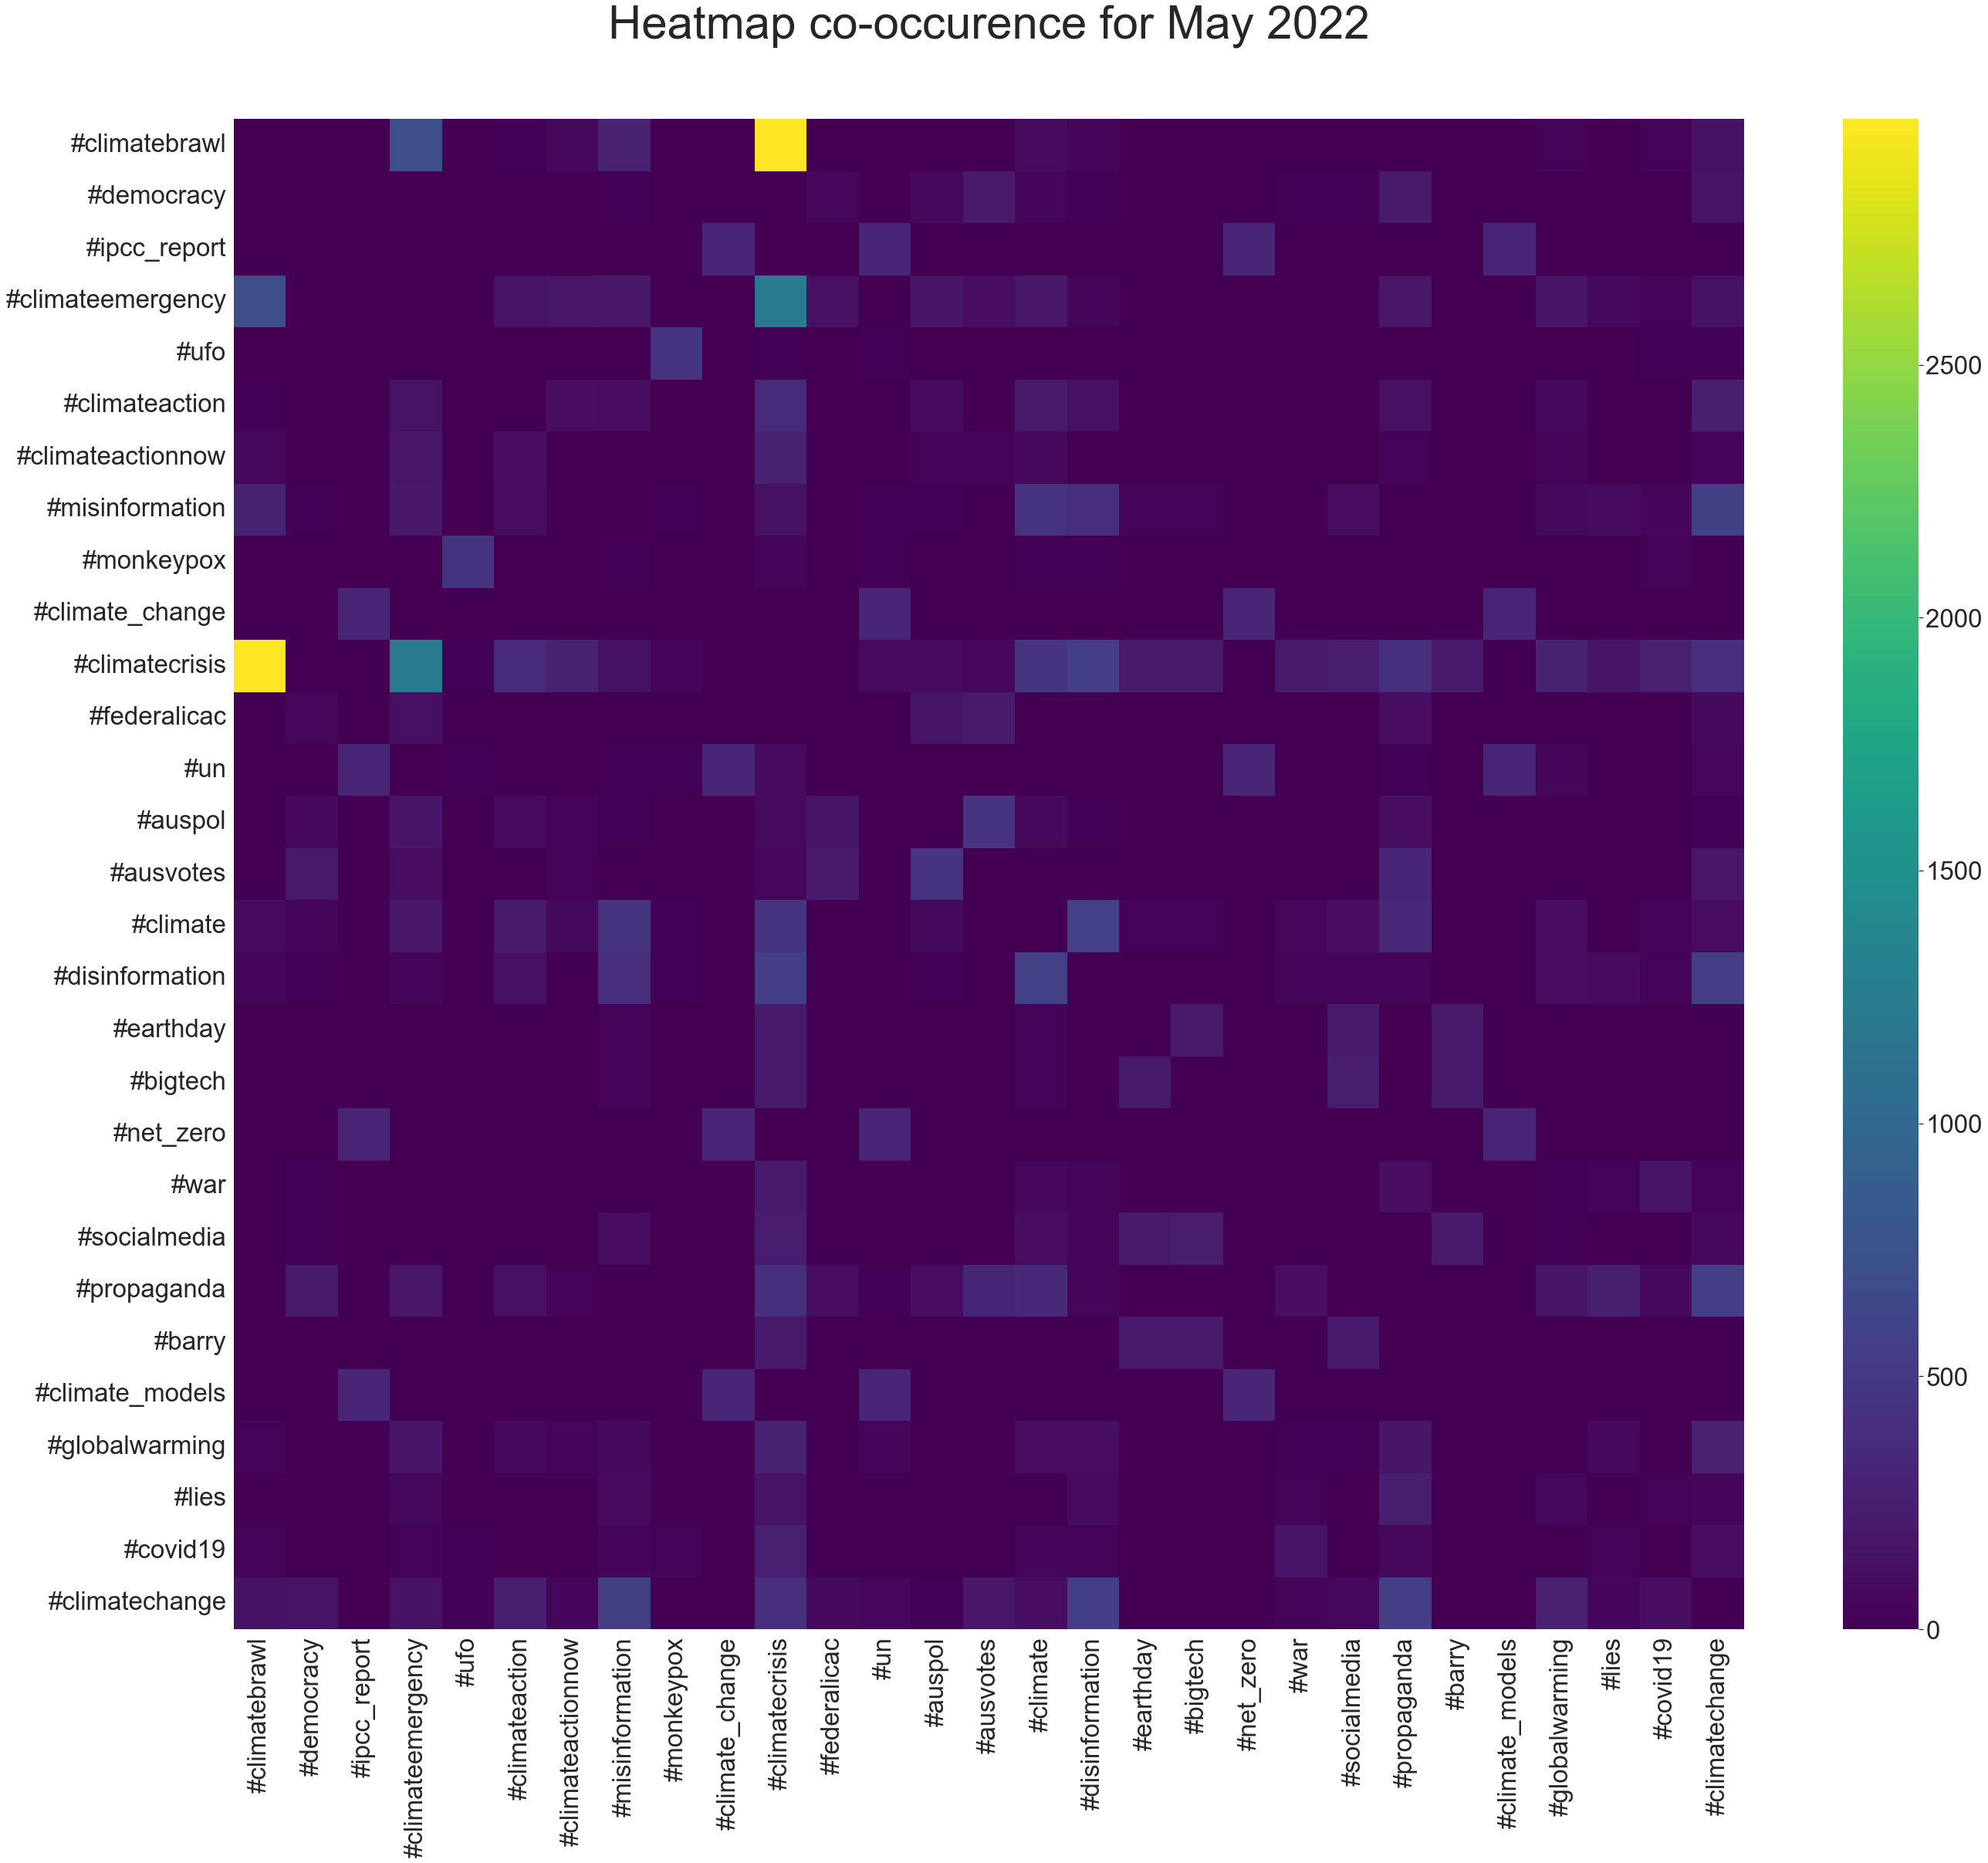

In [11]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for May 2022", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_May22.png")

In [5]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#climatebrawl', '#climatecrisis'), 2986),
 (('#climatecrisis', '#climateemergency'), 1223),
 (('#climatebrawl', '#climateemergency'), 722),
 (('#climate', '#disinformation'), 561),
 (('#climatechange', '#misinformation'), 558),
 (('#climatecrisis', '#disinformation'), 543),
 (('#climatechange', '#propaganda'), 542),
 (('#climatechange', '#disinformation'), 538),
 (('#climate', '#climatecrisis'), 458),
 (('#auspol', '#ausvotes'), 452),
 (('#monkeypox', '#ufo'), 438),
 (('#climate', '#misinformation'), 432),
 (('#climatecrisis', '#propaganda'), 412),
 (('#climatechange', '#climatecrisis'), 402),
 (('#disinformation', '#misinformation'), 394),
 (('#climateaction', '#climatecrisis'), 353),
 (('#climate', '#propaganda'), 329),
 (('#ausvotes', '#propaganda'), 322),
 (('#climate_change', '#climate_models'), 308),
 (('#climate_change', '#ipcc_report'), 308),
 (('#climate_change', '#net_zero'), 308),
 (('#climate_change', '#un'), 308),
 (('#climate_models', '#ipcc_report'), 308),
 (('#clima

<AxesSubplot:>

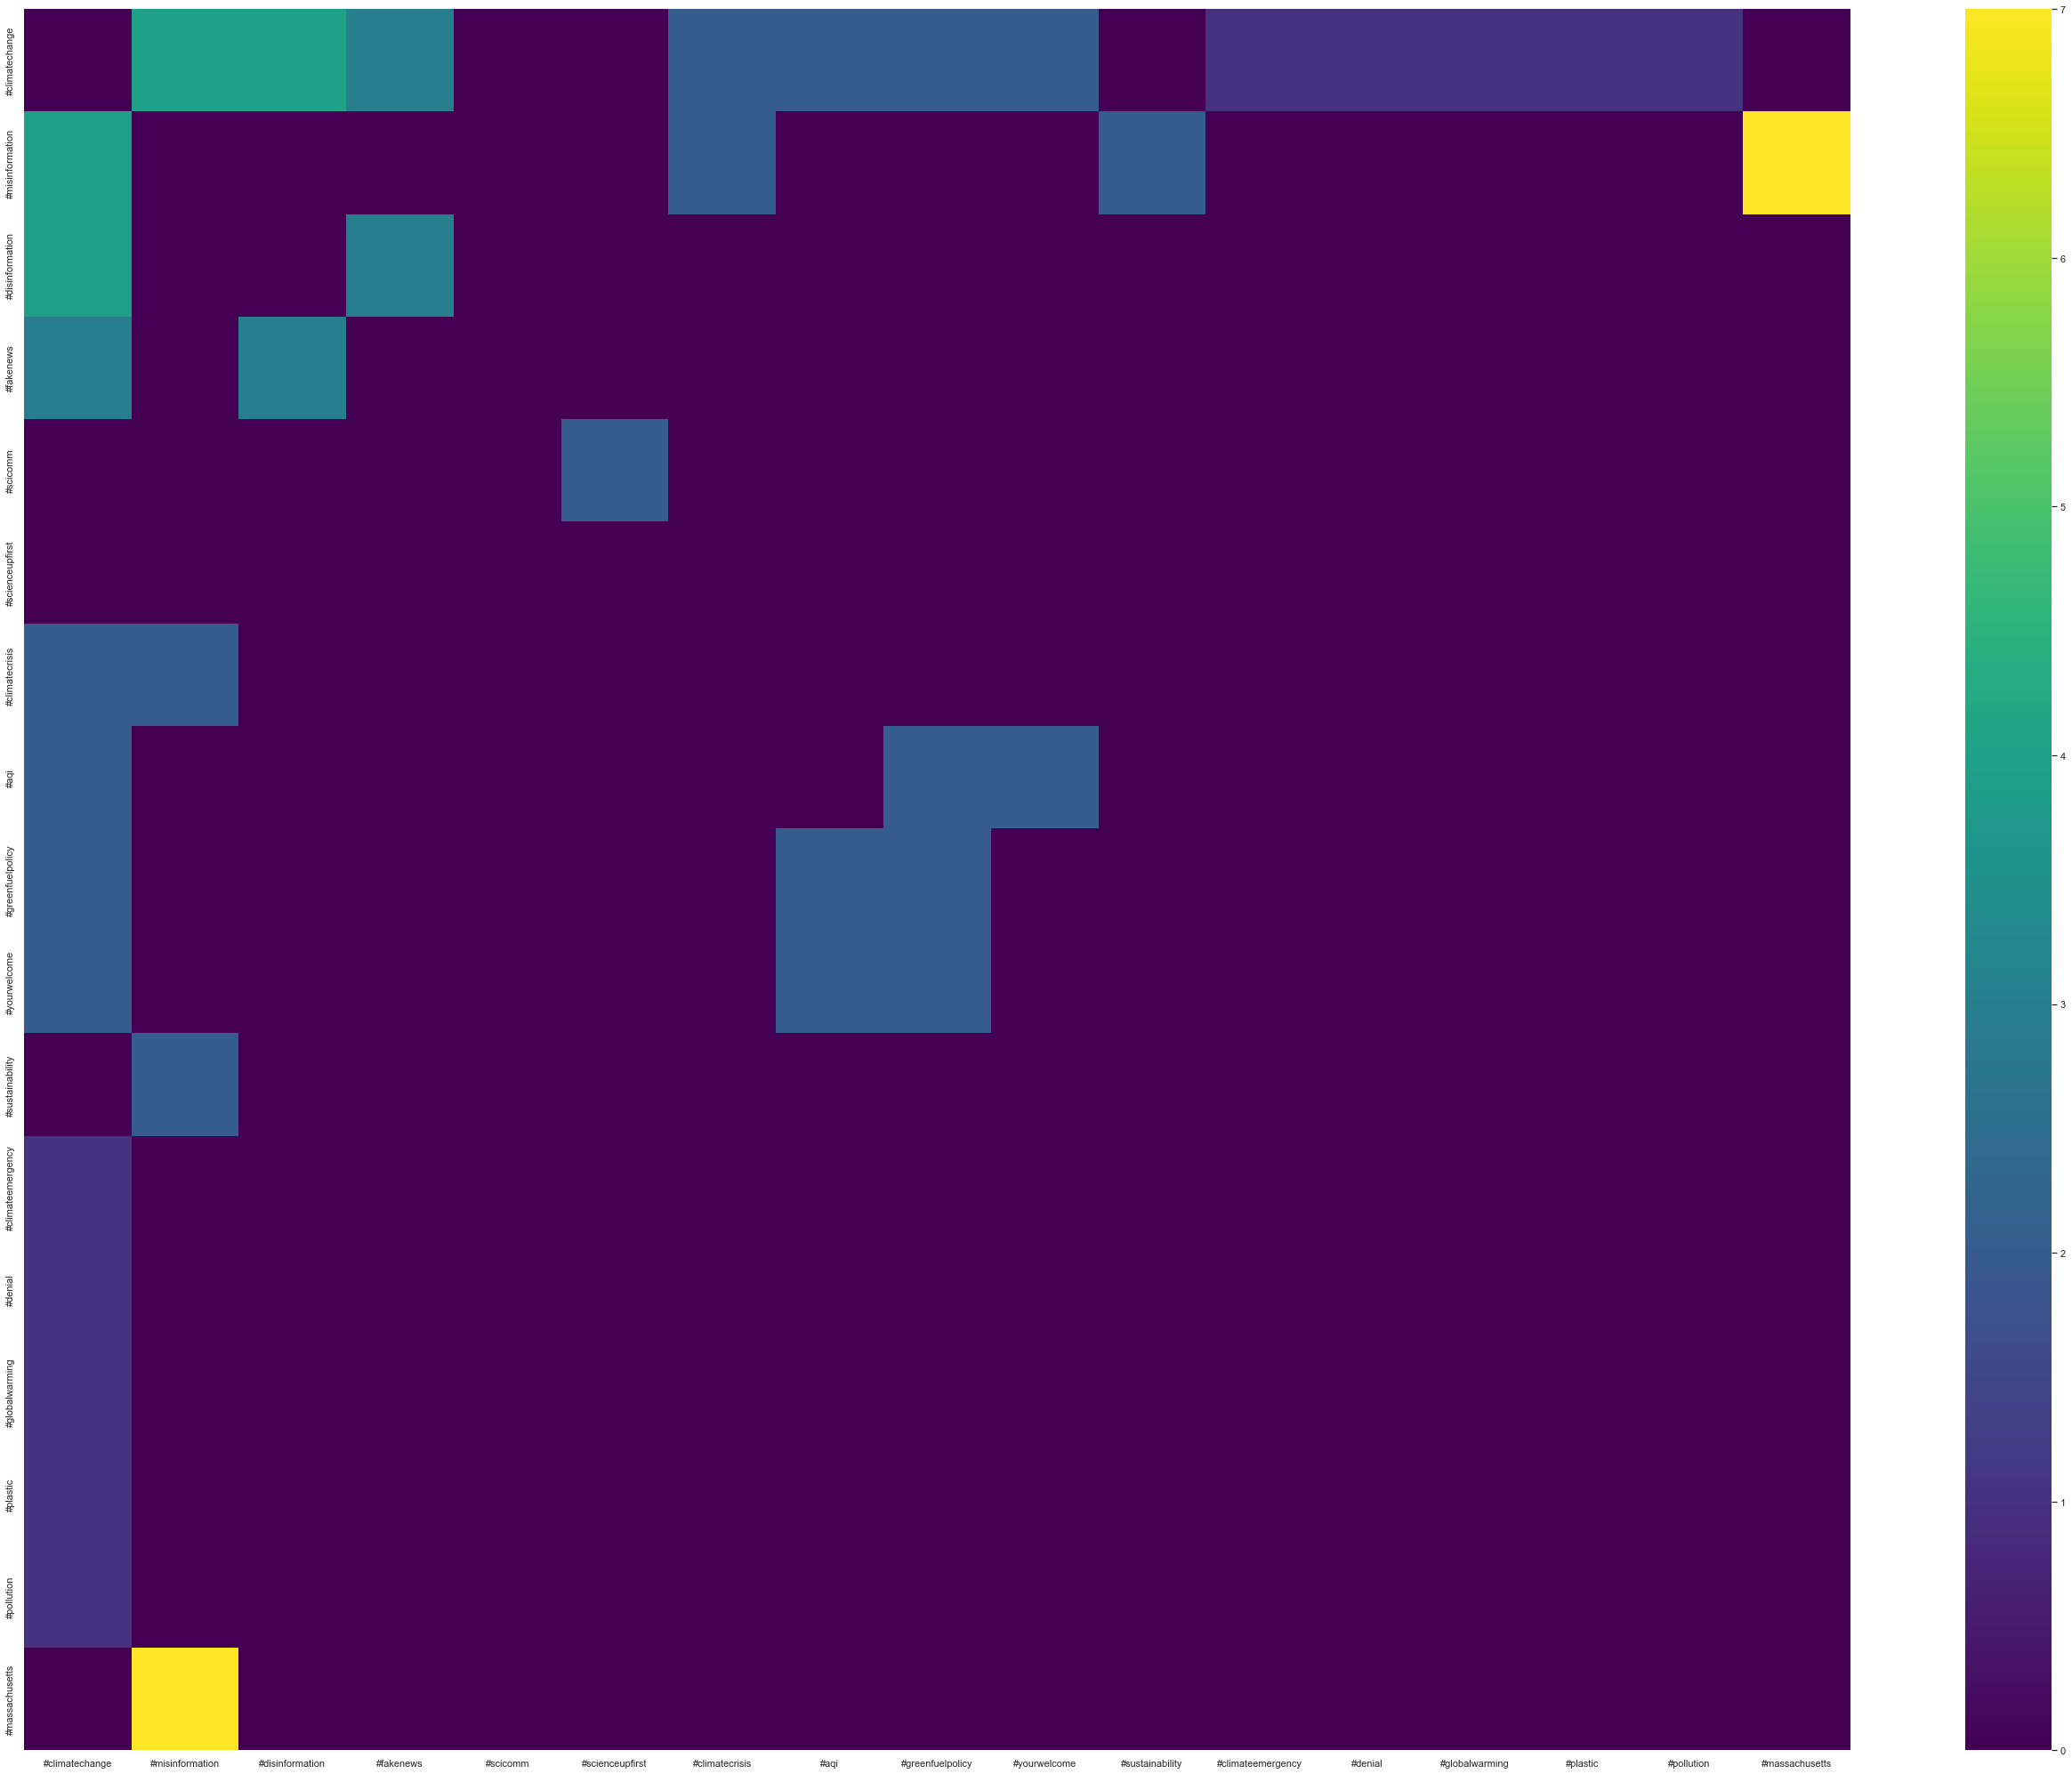

In [94]:
# heatmap_df = pd.DataFrame(data=htag_keys, columns=htag_co, index=htag_co)
# sns.heatmap(heatmap_df, square=False, cmap='viridis')

# Most common hashtags

In [23]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(10)

[('#climatecrisis', 8375),
 ('#climatebrawl', 5537),
 ('#climatechange', 5032),
 ('#climate', 4229),
 ('#climatescience', 3430),
 ('#propaganda', 3325),
 ('#climateemergency', 2713),
 ('#misinformation', 2588),
 ('#disinformation', 2422),
 ('#vote', 2202)]

# Concordance

In [52]:
print(climate_strings[0:10000])

 fake news, bud. numbers are declining, size of fires are declining. the only thing that is rising is the blood pressure of climate alarmists who aren’t getting what they want. https://t.co/uk4dset5yi has those crazy climate scientists superceded poopy fake news too far?  hey, peter! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon  hey, dave! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon rt : it’s also important to distinct this from the right-wing “fema camp” conspiracy, in that:
1. climate breakdown is actual… rt : this is weird conspiracy theory prepper bullshit. this is a sob

In [9]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("happy", width=150, lines=50)

Displaying 50 of 31794 matches:
s://t.co/kp6xmfj2qr rt :      just correcting the propaganda the abc is happy to spread…  of global warming were as bad as the idiots say london, flo
monger's propaganda rt :      just correcting the propaganda the abc is happy to spread… rt :      just correcting the propaganda the abc is happy to
is happy to spread… rt :      just correcting the propaganda the abc is happy to spread… rt :      just correcting the propaganda the abc is happy to
is happy to spread… rt :      just correcting the propaganda the abc is happy to spread… rt :      just correcting the propaganda the abc is happy to
is happy to spread… rt :      just correcting the propaganda the abc is happy to spread… rt :    almost all press pictures accompanying "climate" pro
are of pure (uncon… rt :      just correcting the propaganda the abc is happy to spread… rt :    almost all press pictures accompanying "climate" pro
are of pure (uncon… rt :      just correcting the propaganda the abc

# Random tweets


In [59]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

64899091    rt @pokershash: modi’s\n\n15 lakh: never promised\n2 crore job: false, never promised\nclimate not changed: clipped, false propaganda\n\nrahul’s…
50598383         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
3622513         rt @sankrant: fake news. world over in hot tropical climates native women were often bare chested,\nas men were. western women’s “bra-burnin…
61405454         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
51885812         rt @khayhoe: usgs director reilly, a former astronaut and petroleum geologist, claims the national climate assessment used "inaccurate mode…
25214999                                                  people who call climate change "liberal propaganda" are the same people who think the earth is flat
50715721         rt @ecosensenow: the “climate crisi

In [6]:
for index, row in df.iterrows():
    if "vote" in row.tweet_text:
        pprint(row.tweet_text)

('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac '
 '#votethemallout2022 \n'
 'we want our abc back not this #ipa infiltrated #lnp partisan propaganda.')
('trump! they have spent billions trying to run him thru the dirt! they knew 4 '
 'more he would of killed them and their give away program for votes!they hate '
 'free speech because it hurts their lying propaganda program! like a man can '
 'be pregnant are global warming, trans in schools!')
('@mon4kooyong what about the real issues…?\n'
 '\n'
 'climate propaganda is part of systematic-gov-corruption!\n'
 'and so is overreacting medicle-fascism!\n'
 '\n'
 'if these are not authentically addressed, your just part of the same '
 'problem. \n'
 '\n'
 '#auspol #ausvotes22 #auspolsocorrupt #votethemallout2022')
('@keir_starmer a vote for labour is a vote for whining fringe activism!! a '
 'party so scared of a cult that they’re unable to define what a woman is, so '
 'enthrall of climates extremism they can’t condemn t

('@sexygirl798 no where am i spreading misinformation. student loans are one '
 'of the top issues for youth voters, along with marijuana decrim, voting '
 'rights, and climate change. voter motivation is a key aspect of getting '
 'folks to the polls.')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac '
 '@theheraldsun where’s your balanced story with @mon4kooyong ?\n'
 '\n'
 'what a load of biased, staged, touchy feely lnp propaganda!\n'
 '\n'
 '@joshfrydenberg would do well to remember it’s his climate policy that will '
 'have dire effects on his family! \n'
 '\n'
 '@climate200 #kooyongvotes #frydenberg #auspol')
('@aparachick @ronnisalt @mjrowland68 @joshfrydenberg @mon4kooyong @climate200 '
 '@simonahac @zdaniel @libbycoker ms coker has my vote, but geez there’s a lot '
 'of stephanie asher propaganda around.')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac call this '
 'out for what it is michael. blatant propaganda. #ausvotes')
('@mjrowland

 'disinformation campaign (much of it on social media) that did convince some '
 'to switch their votes.')
('@simonahac @j_c_campbell @climate200 no, james, i’m not rich. i just care '
 'like heck about not living in a country subject to #statecapture. integrity '
 'will make climate action possible. you should be ashamed of your partisan '
 'spin. did you choose journalism to become a propaganda voice? #ausvotes')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac michael, '
 'you’re “reporting” that #propaganda   stenographically why? where’s layered, '
 'more prismatic context &amp; analysis re #kooyongvotes? you know those '
 'details i’m sure. can you reflect on your own #journalism practice here? '
 'your #democracy role? #publicbroadcasting #ausvotes')
('@simonahac @j_c_campbell @climate200 @j_c_campbell might be confusing voters '
 "in 'teal' electorates with the disengaged voters who happily consume murdoch "
 'propaganda simon? must be hard for propagandists l

('non-citizen murdoch attacks  teal independents and climate 200...\n'
 '\n'
 'this bastard aided and abetted the most corrupt and disfunctional government '
 'in australian history.\n'
 '\n'
 "news corp is not news.  it's propaganda aimed at the stupid and the stupid "
 'vote.  are you one of the stupid? https://t.co/rlh03srlyz')
('@thomas_lord @helmandaniel @climatehuman ok, but libertarians hated '
 'hillaryclinton more than they loved one dollar one vote and free speech for '
 'money, so now everyone knows what listening to them brings. there is a '
 'reason bigoil only spends peanuts on disinformation; it’s because publicly '
 'is only good up to a point.')
('@steven46847924 @ivoteclimate @atrupar i’m crying you do realize that is a '
 'satirical fake news website, right? https://t.co/g3slngygtq')
('@steven46847924 @ivoteclimate @atrupar braindead meatbags… because they '
 'don’t agree with you, right? because they believe women should have access '
 'to abortion, vaccines work, c

('much like big oil, @carlinarivera @marklevinenyc @voteshekar  @nycparks '
 '&amp; others have enacted a policy of disinformation about the $1.5b escr '
 'plan.  hoping @frontlinepbs has the balls to expose their hypocrisy. \n'
 '#climateactionnow #saveeastriverpark \n'
 'https://t.co/p0ksxjzrx1')
('@polarvan @ghostwhovotes ah, but is recent history relevant when times are '
 'changing at such a stupendous rate? social media, the rise (and power) of '
 'the conspiracy theory, climate change; it just feels like everything is '
 'frantic and urgent these days. was it really like that even 9 years ago?')
('so @fionamartinmp has preferenced far-right climate change denying covid '
 'conspiracy theorists liberal democrats second on her how to vote card. look '
 'at what politicians do, not what they say.\n'
 'put lnp last.\n'
 '#auspol #ausvotes https://t.co/h9isrqx2zx')
('@juliemorcomb @gop murdering babies\n'
 'the sizing of private property\n'
 'communism\n'
 'totalitarianism\n'
 'vote 

("well there's some blatant propaganda if ever i saw some.\n"
 '\n'
 "#murdoch wants joshi to continue to be the world's worst treasurer - why?  "
 "he's practically bankrupted the entire country.\n"
 '\n'
 '#alboforpm! #independent #greens\n'
 '#climateemergency #federalicac\n'
 '#auspol #ausvotes2022 #ausvotes https://t.co/gq6prkuwms')
('stop the misinformation @votelewko \n'
 '\n'
 'simon holmes á court does not have a political party.\n'
 '\n'
 "climate 200's goal is to support political candidates committed to a "
 'science-based approach to climate change and to restoring integrity in '
 'politics\n'
 '\n'
 'facts matter.')
('@bay_shoe @ivoteclimate @atrupar what’s ironic about this whole simulation '
 'is that the left become useful idiots to the profit of companies which is '
 'what they say they are against. their only hope is tax to keep them going.')
('@scottrod__ @ichanisrara @angelabeevs kung mag no yang result that proves '
 'the deep mis/disinformation they have sown. al

('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac '
 '@theheraldsun where’s your balanced story with @mon4kooyong ?\n'
 '\n'
 'what a load of biased, staged, touchy feely lnp propaganda!\n'
 '\n'
 '@joshfrydenberg would do well to remember it’s his climate policy that will '
 'have dire effects on his family! \n'
 '\n'
 '@climate200 #kooyongvotes #frydenberg #auspol')
('@aparachick @ronnisalt @mjrowland68 @joshfrydenberg @mon4kooyong @climate200 '
 '@simonahac @zdaniel @libbycoker ms coker has my vote, but geez there’s a lot '
 'of stephanie asher propaganda around.')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac call this '
 'out for what it is michael. blatant propaganda. #ausvotes')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac call this '
 'out for what it is michael. blatant propaganda. #ausvotes just')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac ‘candid’?? '
 'this is pure performance and the herald

('sorry but i guess one wrong vote from a few people fucked up the whole '
 'planet forever. nothing before that mattered…not the inequality or climate '
 'crisis, just the fact some people voted green due to political propaganda on '
 'only been around a decade social media.')
('meanwhile, in a publication selling propaganda over policy analysis…\n'
 'first order of business post real #climate action, addressing media '
 'concentration in oz.\n'
 '#ausvotes2022 https://t.co/2ed007hlt5')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac '
 '#votethemallout2022 \n'
 'we want our abc back not this #ipa infiltrated #lnp partisan propaganda.')
('trump! they have spent billions trying to run him thru the dirt! they knew 4 '
 'more he would of killed them and their give away program for votes!they hate '
 'free speech because it hurts their lying propaganda program! like a man can '
 'be pregnant are global warming, trans in schools!')
('@mon4kooyong what about the real issu

('@vickivalebale1 say what you mean, funded by who? \n'
 '\n'
 'they’re standing in seats where conservative voters want conservative mps '
 'who will act on climate change. it’s pretty simple. there’s no conspiracy, '
 'it’s just sensible.')
("brazil's president told leonardo dicaprio to 'keep his mouth shut' after the "
 'actor called on brazilians to vote for pro-climate candidates '
 'https://t.co/fs0jjblh08 he is a follower of the deep state has was at the '
 'meeting on how to push their new world order. just saying timetells')
('gusto ko rin magpanaga bukas kaso may mil forum kami and balak kong itreat '
 "sarili ko bukas. okay lang, alam kong masaya rin si vp leni knowing na i'm "
 'attending a forum addressing voters ed, climate change, and fact-checking. '
 'love u madammm vp @lenirobredo !!')
('wake up aussies-trillion dollar debt-surging inflation-integrity commission '
 'icac-climate change-politicians talk to voters &amp; not rich mates,  rorts '
 'misinformation lies &am

('much like big oil, @carlinarivera @marklevinenyc @voteshekar  @nycparks '
 '&amp; others have enacted a policy of disinformation about the $1.5b escr '
 'plan.  hoping @frontlinepbs has the balls to expose their hypocrisy. \n'
 '#climateactionnow #saveeastriverpark \n'
 'https://t.co/p0ksxjzrx1')
('@polarvan @ghostwhovotes ah, but is recent history relevant when times are '
 'changing at such a stupendous rate? social media, the rise (and power) of '
 'the conspiracy theory, climate change; it just feels like everything is '
 'frantic and urgent these days. was it really like that even 9 years ago?')
('so @fionamartinmp has preferenced far-right climate change denying covid '
 'conspiracy theorists liberal democrats second on her how to vote card. look '
 'at what politicians do, not what they say.\n'
 'put lnp last.\n'
 '#auspol #ausvotes https://t.co/h9isrqx2zx')
('@juliemorcomb @gop murdering babies\n'
 'the sizing of private property\n'
 'communism\n'
 'totalitarianism\n'
 'vote 

('so is @turnbullmalcolm giving a speech supporting the @simonahac political '
 'party of #climate200 over @davesharma in #wentworthvotes from #australia or '
 'the #usa?\n'
 '\n'
 "if it's from outside #australia is it foreign political interference in the "
 'election @auselectoralcom \n'
 '\n'
 '#auspol https://t.co/izcbww89yx')
('@vickivalebale1 say what you mean, funded by who? \n'
 '\n'
 'they’re standing in seats where conservative voters want conservative mps '
 'who will act on climate change. it’s pretty simple. there’s no conspiracy, '
 'it’s just sensible.')
("brazil's president told leonardo dicaprio to 'keep his mouth shut' after the "
 'actor called on brazilians to vote for pro-climate candidates '
 'https://t.co/fs0jjblh08 he is a follower of the deep state has was at the '
 'meeting on how to push their new world order. just saying timetells')
('gusto ko rin magpanaga bukas kaso may mil forum kami and balak kong itreat '
 "sarili ko bukas. okay lang, alam kong masaya 

 '\n'
 'i see it, you must see it, voters in kooyong must see it!\n'
 '\n'
 '#murdochroyalcommission #murdochguttermedia \n'
 '\n'
 '#auspol')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac seriously, '
 "michael rowland @mjrowland68 ??! we don't pay taxes to support the abc to "
 'then have you promoting  #murdochguttermedia #propaganda! \n'
 '#ausvotes #auspol \n'
 '\n'
 'https://t.co/ndjupj2e0i https://t.co/zdnohriv6x')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac oh look the '
 "lnp's official cheerleading squad are out promoting fraudenberg today in "
 'their daily propaganda machine\n'
 '\n'
 '#murdochguttermedia #murdochroyalcommission #thisisnotjournalism '
 '#ausvotes2022 \n'
 '#votejoshout')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac just '
 'correcting the propaganda the abc is happy to spread\n'
 '\n'
 'dr monique ryan gave up a career in pediatric neurology at one of the '
 "world's leading children's hospit

('the democrats are the party of disinformation &amp; voter fraud. this is why '
 'they oppose voter id and signature verification.  they own the russian hoax, '
 'steele dossier, both impeachments, global warming, etc. they use the fbi and '
 'doj weapons. we must fight.  https://t.co/gjomzyo1xc')
('agree. only mention so far was a negative and inaccurate vibe at @simonahac '
 'and @climate200 @abcnews because commentariat just can’t conceive of an '
 '#independent #representative movement #crowdfunded further for strong '
 '#climateactionnow #commitment without a ‘deal’. #ausvotes')
("@michaelw5511 @mandy_blahblah @adambandt 'climate change' is a trojan horse "
 "for implementing socialism. anyone using the term 'climate crisis' is either "
 'being politically manipulative or has been fooled by the propaganda. both '
 'get to vote 😬')
('@adambandt greens 🥬 climate change lefty looneys 👀 never 👎 vote greens 🥬 '
 'climate change is pure propaganda…. https://t.co/ygbrsteg0f')
('it is ha

('stop the misinformation @votelewko \n'
 '\n'
 'simon holmes á court does not have a political party.\n'
 '\n'
 "climate 200's goal is to support political candidates committed to a "
 'science-based approach to climate change and to restoring integrity in '
 'politics\n'
 '\n'
 'facts matter.')
('@bay_shoe @ivoteclimate @atrupar what’s ironic about this whole simulation '
 'is that the left become useful idiots to the profit of companies which is '
 'what they say they are against. their only hope is tax to keep them going.')
('@scottrod__ @ichanisrara @angelabeevs kung mag no yang result that proves '
 'the deep mis/disinformation they have sown. along with the ill-gotten wealth '
 'used to buy votes. \n'
 'i wonder if in these green countries have similar election climate with '
 'philippines eg. vote buying, block voting from religious orgs.')
('@steven46847924 @ivoteclimate @atrupar the fact that so many republicans '
 'have a genuine hatred for anyone that disagrees with them re

("voters aren't driving the climate change propaganda.\n"
 "it's a consortium of the left elite driving it, and it's about control not "
 'conservation.')
("it's an off shoot of usforthem. check out @karamballes @aw_what and "
 '@josie19752. @karamballes has been carefully documenting and mapping the '
 'huge network of groups devoted to covid misinformation set up via koch  a '
 'huge american company  that also promotes climate denial.')
('"without an officially sanctioned group devoted to racism, perpetuating '
 'climate change, killing lgbtq+ people and women, and wacky conspiracy '
 'theories, how are we supposed to scare people into giving us more money? '
 'what do you expect, that we\'re going to start doing stuff?"')
('@robreiner climate change is like trump russia collusion, and all the other '
 'failed accusations made against president trump. misinformation. fairy '
 'tales, all made up to fool people. but the people are smart. inflation, fuel '
 'prices, food prices, the f

('@steven46847924 @ivoteclimate @atrupar i’m crying you do realize that is a '
 'satirical fake news website, right? https://t.co/g3slngygtq')
('@steven46847924 @ivoteclimate @atrupar braindead meatbags… because they '
 'don’t agree with you, right? because they believe women should have access '
 'to abortion, vaccines work, climate change is real, people should be able to '
 'make individual choices about their identity, and don’t believe in '
 'conspiracy theories?')
('@zdaniel goldstein stooge? no integrity? ignores parents. brighton primary '
 'still to host climate propaganda film inc kerry o’brien, gorgi coghlan, '
 'sandra sully, tim flannery, larissa behrendt and david pocock tues 3 may. '
 '@suzandelibasic @theheraldsun @ritapanahi #ausvotes22')
("well there's some blatant propaganda if ever i saw some.\n"
 '\n'
 "#murdoch wants joshi to continue to be the world's worst treasurer - why?  "
 "he's practically bankrupted the entire country.\n"
 '\n'
 '#alboforpm! #independent #

('@jeancharest_ @joe_warmington @cpc_hq @ivisonj ‘conspiracy’🤦\u200d♂️🥴. the '
 'globalist left’s version of the ‘race card’ …to be pulled out anytime they '
 'get challenged or held accountable. just give up you fng bird. you’re  '
 'beyond out of touch w ppl you needs votes from and your lack of self '
 'awareness is pathetic.')
('@king_redwald trump is irrelevant, i don’t think about him much at all. '
 'politics isn’t a team sport, i vote for policies, i’m not aligned with any '
 'party. i got vaccinated, because i’m not a weirdo conspiracy theorist. and '
 'climate change is real, sure, anyone who doesn’t think so is a moron')
('@brockbellerive @voteearlynow @amandalarreni like the election was stolen. '
 'democrats want all of your guns. don’t worry about russia not our problem, '
 'justice jackson let pedophiles loose, climate change is a hoax, covid is '
 'just the flu, ivermectin cures covid infections. these aren’t opinions they '
 'are misinformation.')
('@westmm4028 @jkenne

('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac seriously, '
 "michael rowland @mjrowland68 ??! we don't pay taxes to support the abc to "
 'then have you promoting  #murdochguttermedia #propaganda! \n'
 '#ausvotes #auspol \n'
 '\n'
 'https://t.co/ndjupj2e0i https://t.co/zdnohriv6x')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac oh look the '
 "lnp's official cheerleading squad are out promoting fraudenberg today in "
 'their daily propaganda machine\n'
 '\n'
 '#murdochguttermedia #murdochroyalcommission #thisisnotjournalism '
 '#ausvotes2022 \n'
 '#votejoshout')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac just '
 'correcting the propaganda the abc is happy to spread\n'
 '\n'
 'dr monique ryan gave up a career in pediatric neurology at one of the '
 "world's leading children's hospitals for #kooyongvotes\n"
 '\n'
 'she is not "coasting"\n'
 '\n'
 "again frydenberg insults &amp; demeans this woman's integrity &amp; "
 'crede

('the democrats are the party of disinformation &amp; voter fraud. this is why '
 'they oppose voter id and signature verification.  they own the russian hoax, '
 'steele dossier, both impeachments, global warming, etc. they use the fbi and '
 'doj weapons. we must fight.  https://t.co/gjomzyo1xc')
('agree. only mention so far was a negative and inaccurate vibe at @simonahac '
 'and @climate200 @abcnews because commentariat just can’t conceive of an '
 '#independent #representative movement #crowdfunded further for strong '
 '#climateactionnow #commitment without a ‘deal’. #ausvotes')
("@michaelw5511 @mandy_blahblah @adambandt 'climate change' is a trojan horse "
 "for implementing socialism. anyone using the term 'climate crisis' is either "
 'being politically manipulative or has been fooled by the propaganda. both '
 'get to vote 😬')
('@adambandt greens 🥬 climate change lefty looneys 👀 never 👎 vote greens 🥬 '
 'climate change is pure propaganda…. https://t.co/ygbrsteg0f')
('it is ha

('#hope #germany and how we(you) responded to #ukraine #eu #usa #voteblue '
 '#climateactionnow close call #france they almost went #populism '
 '#conservatism #lepen #trump #putin #russia #warcrimes sympathizers')
('surely people can see what’s going on here?! 👁👁\n'
 '\n'
 '“climate action” propaganda is about politics, money and power, not '
 'climate.\n'
 '\n'
 '#climate200 #fakeindependents #auspol #ausvotes #curtin #goldstein #kooyong '
 '#wentworth #mackellar https://t.co/wwuprrinf6')
('@gemmatognini the internal lnp polls must be showing that joshy &amp; timmy '
 'are in big trouble. time for a smear &amp; fear attack piece from the lnp '
 'propaganda wing aka the murdoch &amp; nine media. remember a vote for either '
 'is a vote for barnyard running the policies on climate action! '
 'https://t.co/ufsn8oo2hl')
("@kylegriffin1 hmm. russian collusion, hunter's laptop, safe and effective, "
 'jan 6th, most secure election in history, climate change, government '
 'shutdowns, mostl

('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac this is '
 'shameful media propaganda!\n'
 '\n'
 'murdoch undermines democracy again.\n'
 '\n'
 'if i lived in kooyong i wouldn’t vote for frydenberg bc of this blatant '
 'media propaganda! \n'
 '\n'
 'i see it, you must see it, voters in kooyong must see it!\n'
 '\n'
 '#murdochroyalcommission #murdochguttermedia \n'
 '\n'
 '#auspol')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac seriously, '
 "michael rowland @mjrowland68 ??! we don't pay taxes to support the abc to "
 'then have you promoting  #murdochguttermedia #propaganda! \n'
 '#ausvotes #auspol \n'
 '\n'
 'https://t.co/ndjupj2e0i https://t.co/zdnohriv6x')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac oh look the '
 "lnp's official cheerleading squad are out promoting fraudenberg today in "
 'their daily propaganda machine\n'
 '\n'
 '#murdochguttermedia #murdochroyalcommission #thisisnotjournalism '
 '#ausvotes2022 \n'
 '

 '\n'
 '#auspol https://t.co/izcbww89yx')
('@vickivalebale1 say what you mean, funded by who? \n'
 '\n'
 'they’re standing in seats where conservative voters want conservative mps '
 'who will act on climate change. it’s pretty simple. there’s no conspiracy, '
 'it’s just sensible.')
("brazil's president told leonardo dicaprio to 'keep his mouth shut' after the "
 'actor called on brazilians to vote for pro-climate candidates '
 'https://t.co/fs0jjblh08 he is a follower of the deep state has was at the '
 'meeting on how to push their new world order. just saying timetells')
('gusto ko rin magpanaga bukas kaso may mil forum kami and balak kong itreat '
 "sarili ko bukas. okay lang, alam kong masaya rin si vp leni knowing na i'm "
 'attending a forum addressing voters ed, climate change, and fact-checking. '
 'love u madammm vp @lenirobredo !!')
('wake up aussies-trillion dollar debt-surging inflation-integrity commission '
 'icac-climate change-politicians talk to voters &amp; not rich

('@hula_grl @ronnisalt @shaunmicallef @abc730 @instanterudite @kyleatink '
 '@helenhainesindi @steele4hughes @hughesrenews @chaneyforcurtin '
 '@suzieholt4groom unfortunately, there are supporters of independents telling '
 'voters that independents supported by climate 200 are fake independents and '
 'taking dubious money. it is appalling to hear such disinformation spread.')
('@libdemaus the young voters have been taught this propaganda of climate '
 'change vote the greens in our school systems.  i heard of another young '
 'death 14yrs old girl so sad. what is going on in our school system that our '
 'kids fear that they have no future?')
('@nobby15 @senbmckenzie said australians should be pleased by what they saw '
 'in the #leadersdebate by @scottmorrisonmp , yeah a man who denies the #facts '
 ', yells over the top of #alboforpm to spread his lies &amp; misinformation '
 'on climate climate , a #federalicac &amp; cost of living #ausvotes')
("voters aren't driving the climate c

('another flood emergency in australia yet the climate emergency is not '
 'featuring in #ausvotes2022 at least with mainstream media or the lnp or '
 'alp.\n'
 '@breakfastnews \n'
 '#auspol')
('@wmbrangham @lizhamel @kff now compare gop anti-vaxers to gop climate '
 'deniers. \n'
 '\n'
 'here in the west, even as farms dry up &amp; cattle range burns, the same '
 'people will continue to vote r because hate of others is stronger than love '
 'of family, country, or the planet.\n'
 '\n'
 'don’t blame disinformation for moral cancer.')
('it’s fascinating to see not just murdoch-lnp politicians descend into '
 'desperate, wild panic, but also their operatives in the murdoch-lnp '
 'propaganda arm. \n'
 '\n'
 'so very, very scared.\n'
 '\n'
 'of a federal icac.\n'
 '\n'
 '#ausvotes #auspoll2022 #auspol #climate200 #federalicacnow')
('@janetwagner21 conservatives are the death party. death by covid. death by '
 'climate. death by racism. death by misogyny. death by ignorance. death by '
 '

('his brother isn’t pm.\n'
 '\n'
 'morrison gave cover to ministers and a staffer accused of rape. \n'
 '\n'
 'he amplifies transphobia for far right religious votes.\n'
 '\n'
 'to what end?\n'
 '\n'
 'he minimises climate change through propaganda and obstructs renewables.\n'
 '\n'
 'he holds power to serve carbon interests.\n'
 '.')
('@ostrowudi @antonygreenelec i believe in free speech &amp; registering my '
 'voice u on the other hand say we don’t count sorry to disappoint u aust used '
 'to b a democracy &amp; every vote counted - i would not vote for corrupt alp '
 'or hypocritical lnp or climate change propaganda of the greens the vote must '
 'be rigged')
('@suxhypocrisy the fascists have been making enemies and friends, in our '
 'name, because our votes are cast with as much informed sincerity as lnp '
 'climate policy. disinformation hinders voters and benefits the deceivers, '
 'corrupt msm package the fix. is funding the ‘new media’ an avenue to truth?')
('@mjrowland68 @jo

('@vickivalebale1 say what you mean, funded by who? \n'
 '\n'
 'they’re standing in seats where conservative voters want conservative mps '
 'who will act on climate change. it’s pretty simple. there’s no conspiracy, '
 'it’s just sensible.')
("brazil's president told leonardo dicaprio to 'keep his mouth shut' after the "
 'actor called on brazilians to vote for pro-climate candidates '
 'https://t.co/fs0jjblh08 he is a follower of the deep state has was at the '
 'meeting on how to push their new world order. just saying timetells')
('gusto ko rin magpanaga bukas kaso may mil forum kami and balak kong itreat '
 "sarili ko bukas. okay lang, alam kong masaya rin si vp leni knowing na i'm "
 'attending a forum addressing voters ed, climate change, and fact-checking. '
 'love u madammm vp @lenirobredo !!')
('wake up aussies-trillion dollar debt-surging inflation-integrity commission '
 'icac-climate change-politicians talk to voters &amp; not rich mates,  rorts '
 'misinformation lies &am

 'try to repeal social programs\n'
 'gerrymander the fuck out of voting districts\n'
 '(1)')
('@ruhikhan_ i would tweet the following: \n'
 '\n'
 '"climate change is a hoax. scientists are all in on the conspiracy to '
 'destroy the good reputation of the fossil feul industry. buy more coal!!!!"\n'
 '\n'
 'or "vote republican america it\'s the only way to make america great again"\n'
 '\n'
 '"i love putin"\n'
 '\n'
 'hehe 😉')
('@antoniojx @w56annie @ruthdur29266664 @dfozz2 @lorilightfoot @debmotionless5 '
 'gqp is a nickname for a us political party (republicans or gop) who vote for '
 'racist policies, against climate action, &amp; ~25% of them believe qanon '
 'conspiracy theories. i understand q morphed into conspiracy theories '
 'specific to other nations also, so maybe you know of it.')
('@latimes sick of this hypocritical party, they do things that endanger the '
 'lives of the american people like being anti-vaxx, being anti-mask during a '
 'pandemic and denying global warming

('@sexygirl798 no where am i spreading misinformation. student loans are one '
 'of the top issues for youth voters, along with marijuana decrim, voting '
 'rights, and climate change. voter motivation is a key aspect of getting '
 'folks to the polls.')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac '
 '@theheraldsun where’s your balanced story with @mon4kooyong ?\n'
 '\n'
 'what a load of biased, staged, touchy feely lnp propaganda!\n'
 '\n'
 '@joshfrydenberg would do well to remember it’s his climate policy that will '
 'have dire effects on his family! \n'
 '\n'
 '@climate200 #kooyongvotes #frydenberg #auspol')
('@aparachick @ronnisalt @mjrowland68 @joshfrydenberg @mon4kooyong @climate200 '
 '@simonahac @zdaniel @libbycoker ms coker has my vote, but geez there’s a lot '
 'of stephanie asher propaganda around.')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac call this '
 'out for what it is michael. blatant propaganda. #ausvotes')
('@mjrowland

('meanwhile, in a publication selling propaganda over policy analysis…\n'
 'first order of business post real #climate action, addressing media '
 'concentration in oz.\n'
 '#ausvotes2022 https://t.co/2ed007hlt5')
('the democrats are the party of disinformation &amp; voter fraud. this is why '
 'they oppose voter id and signature verification.  they own the russian hoax, '
 'steele dossier, both impeachments, global warming, etc. they use the fbi and '
 'doj weapons. we must fight.  https://t.co/gjomzyo1xc')
('agree. only mention so far was a negative and inaccurate vibe at @simonahac '
 'and @climate200 @abcnews because commentariat just can’t conceive of an '
 '#independent #representative movement #crowdfunded further for strong '
 '#climateactionnow #commitment without a ‘deal’. #ausvotes')
("@michaelw5511 @mandy_blahblah @adambandt 'climate change' is a trojan horse "
 "for implementing socialism. anyone using the term 'climate crisis' is either "
 'being politically manipulative 

 '\n'
 'or "vote republican america it\'s the only way to make america great again"\n'
 '\n'
 '"i love putin"\n'
 '\n'
 'hehe 😉')
('@antoniojx @w56annie @ruthdur29266664 @dfozz2 @lorilightfoot @debmotionless5 '
 'gqp is a nickname for a us political party (republicans or gop) who vote for '
 'racist policies, against climate action, &amp; ~25% of them believe qanon '
 'conspiracy theories. i understand q morphed into conspiracy theories '
 'specific to other nations also, so maybe you know of it.')
('@latimes sick of this hypocritical party, they do things that endanger the '
 'lives of the american people like being anti-vaxx, being anti-mask during a '
 'pandemic and denying global warming. they also undermine the voting process '
 'with the voter fraud conspiracy theories.')
('speaking of coal, i think democratic senators running in states (pa, oh, ky) '
 'which are connected to appalachia are going to have to confront gop '
 'misinformation about coal. it’s tricky because talking c

 '\n'
 '#auspol #coopervotes')
('warning, political post ahead.\n'
 "i just saw a thread on aus politics and someone saying they won't vote "
 'liberal again, that they previously voted them for "climate action", and i '
 'have come to the realisation that the disinformation and gullibility in this '
 'country is way too high.')
('rt @inalabrisbane: tell them  #2000mules is russian disinformation &amp; if '
 'they don’t buy that tell’m it’s caused by #climatechange the voters…')
('rt @inalabrisbane: tell them  #2000mules is russian disinformation &amp; if '
 'they don’t buy that tell’m it’s caused by #climatechange the voters…')
('rt @inalabrisbane: tell them  #2000mules is russian disinformation &amp; if '
 'they don’t buy that tell’m it’s caused by #climatechange the voters…')
('rt @inalabrisbane: tell them  #2000mules is russian disinformation &amp; if '
 'they don’t buy that tell’m it’s caused by #climatechange the voters…')
('tell them  #2000mules is russian disinformation &amp; i

('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac seriously, '
 "michael rowland @mjrowland68 ??! we don't pay taxes to support the abc to "
 'then have you promoting  #murdochguttermedia #propaganda! \n'
 '#ausvotes #auspol \n'
 '\n'
 'https://t.co/ndjupj2e0i https://t.co/zdnohriv6x')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac oh look the '
 "lnp's official cheerleading squad are out promoting fraudenberg today in "
 'their daily propaganda machine\n'
 '\n'
 '#murdochguttermedia #murdochroyalcommission #thisisnotjournalism '
 '#ausvotes2022 \n'
 '#votejoshout')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac just '
 'correcting the propaganda the abc is happy to spread\n'
 '\n'
 'dr monique ryan gave up a career in pediatric neurology at one of the '
 "world's leading children's hospitals for #kooyongvotes\n"
 '\n'
 'she is not "coasting"\n'
 '\n'
 "again frydenberg insults &amp; demeans this woman's integrity &amp; "
 'crede

 '@seanhannity . no more boomer logic! no more gop! #votebluein2022')
('@cpc_hq my vision for🇨🇦: obliterate conservatives.👏🏻end '
 'misinformation/conspiracy theories/social media propaganda. protect '
 'canadians from covid &amp; believe in science. invest in public health '
 'care/education, tackle climate change. tax the super rich &amp; churches. '
 '#nevervoteconservative')
('@jeancharest_ @joe_warmington @cpc_hq @ivisonj the wef is real, their goal '
 'of globalization is real and this means more government control and '
 'surveillance!! this means more centralized control for an entity not voted '
 'by people!!! its not a conspiracy!!!!')
('@jeancharest_ @joe_warmington @cpc_hq @ivisonj ‘conspiracy’🤦\u200d♂️🥴. the '
 'globalist left’s version of the ‘race card’ …to be pulled out anytime they '
 'get challenged or held accountable. just give up you fng bird. you’re  '
 'beyond out of touch w ppl you needs votes from and your lack of self '
 'awareness is pathetic.')
('@king_redwa

('@marklangham2 @lesstonehouse @barnaby_joyce national voters are a special '
 'breed of people. they don’t like government interference until they get into '
 'difficulty and then they want everyone to assist them they want help in '
 'droughts and floods and refuse to admit that climate change is happening let '
 'alone affecting them')
('fact-checking the morrison government energy ads by @ca_latest. this is also '
 'your territory @commsdeclare. don’t be deceived by misleading ads, '
 '#voteclimate in #ausvotes #climatecrisis #energytransition '
 'https://t.co/vlyvn5fjdr')
('@pnpcbc once again we see a cbc reporter ask a question based on '
 'misinformation, the cpc voted against an amendment on the climate in a '
 'platform that already recognized that climate change is real.')
('#hope #germany and how we(you) responded to #ukraine #eu #usa #voteblue '
 '#climateactionnow close call #france they almost went #populism '
 '#conservatism #lepen #trump #putin #russia #warcrimes sympat

('@croakeynews is committed to putting a focus on health equity, social &amp; '
 'cultural determinants of health &amp; issues that are not adequately covered '
 'in the mainstream media - such as climate and health, and health policy! '
 '@melissasweetdr #ausvoteshealth2022')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac smearing '
 'the opposition candidate and false promises/ rorts will not work this time!! '
 'vote #lnpliarscrooksthieves last. #ausvotes\n'
 'https://t.co/vgzzglwjht')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac yep, '
 'propaganda....good and proper. #votethemout')
('@lclimateguy @spark_pat @roberto8824 @marcliberts @nytimes i don’t think '
 'russia hacked voting machines or anything, but i do think they engaged in a '
 'disinformation campaign (much of it on social media) that did convince some '
 'to switch their votes.')
('@simonahac @j_c_campbell @climate200 no, james, i’m not rich. i just care '
 'like heck about not 

("the climate issues are absolutely terrifying, so i've prioritised them and "
 'hope my vote helps the greens get the balance of power in the senate.\n'
 '\n'
 "meanwhile, i'll keep up my pr campaign for china and hope that people will "
 'gradually learn to see through the us propaganda.')
('@johnruddick2 @libdemaus oh yeah, @libdemaus is an anti science, antivax '
 'party without a single practical policy, whose members promote insane '
 'conspiracy theories.\n'
 'john you are on the record as ignoring established climate science.\n'
 'should never be allowed within 100kms of the levers of power\n'
 '#ausvotes22')
('can smart cats look in mirror? ..ever..? trump was 1000x better f world vs '
 'biden admin\n'
 '\n'
 'cldnt see trump russia was fake\n'
 'missed deep state\n'
 'went golly ok w esg/climate change absurdities \n'
 'believed biden got more votes than obama\n'
 'refuse to admit covid was hyped\n'
 '1/3 https://t.co/dz4kmdv3af')
('indeed we do not need @scottmorrisonmp gove

('@lanapopham @jjhorgan already experiencing climate change … could ub more '
 'naive to the fact. the climate always changes &amp; never stops.  u keep '
 'portraying that this is the end of world cause the climate changes like it’s '
 'suppose too. 🙄.  stop manipulating the young voters with idiotic '
 'misinformation')
('@marklangham2 @lesstonehouse @barnaby_joyce national voters are a special '
 'breed of people. they don’t like government interference until they get into '
 'difficulty and then they want everyone to assist them they want help in '
 'droughts and floods and refuse to admit that climate change is happening let '
 'alone affecting them')
('fact-checking the morrison government energy ads by @ca_latest. this is also '
 'your territory @commsdeclare. don’t be deceived by misleading ads, '
 '#voteclimate in #ausvotes #climatecrisis #energytransition '
 'https://t.co/vlyvn5fjdr')
('@pnpcbc once again we see a cbc reporter ask a question based on '
 'misinformation, the c

("@jackposobiec lol!!!  our government can't get a ballot correct....and they "
 'want us to trust them;\n'
 'about viruses,\n'
 'climate change,\n'
 'insurrection,\n'
 'southern border,\n'
 'war in ukraine,\n'
 'elections,\n'
 'disinformation,\n'
 'and byden got 81 million votes!!!')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac '
 '#votethemallout2022 \n'
 'we want our abc back not this #ipa infiltrated #lnp partisan propaganda.')
('trump! they have spent billions trying to run him thru the dirt! they knew 4 '
 'more he would of killed them and their give away program for votes!they hate '
 'free speech because it hurts their lying propaganda program! like a man can '
 'be pregnant are global warming, trans in schools!')
('@mon4kooyong what about the real issues…?\n'
 '\n'
 'climate propaganda is part of systematic-gov-corruption!\n'
 'and so is overreacting medicle-fascism!\n'
 '\n'
 'if these are not authentically addressed, your just part of the same '
 'probl

('@vickivalebale1 say what you mean, funded by who? \n'
 '\n'
 'they’re standing in seats where conservative voters want conservative mps '
 'who will act on climate change. it’s pretty simple. there’s no conspiracy, '
 'it’s just sensible.')
("brazil's president told leonardo dicaprio to 'keep his mouth shut' after the "
 'actor called on brazilians to vote for pro-climate candidates '
 'https://t.co/fs0jjblh08 he is a follower of the deep state has was at the '
 'meeting on how to push their new world order. just saying timetells')
('gusto ko rin magpanaga bukas kaso may mil forum kami and balak kong itreat '
 "sarili ko bukas. okay lang, alam kong masaya rin si vp leni knowing na i'm "
 'attending a forum addressing voters ed, climate change, and fact-checking. '
 'love u madammm vp @lenirobredo !!')
('wake up aussies-trillion dollar debt-surging inflation-integrity commission '
 'icac-climate change-politicians talk to voters &amp; not rich mates,  rorts '
 'misinformation lies &am

 '\n'
 '👉 climate action\n'
 '\n'
 '👉 an icac\n'
 '\n'
 '👉 equality\n'
 '\n'
 'same is not safe\n'
 '\n'
 '#voteindependent   #auspol   #voice4change #sameisntsafe')
('no. for a complex of reasons. one is only some “voices for” independents '
 'have received @climate200 funding. those, i believe, for only part of their '
 '#ausvotes campaign budget. “backed” is a #propaganda word most #media '
 '#journalism has seized upon with “zeal”? #democracy #auspol')
('they were running ads and campaigns in various countries for socialism for '
 'the eu expansion. ireland had to vote 3 times because of interference from '
 'eu. this is more for socialism than climate. they hit ireland hard for eu '
 'instead of brexit.\n'
 'https://t.co/sdzfgnsqji')
('the supreme court already found protesting at peoples houses legal. yawn.\n'
 '\n'
 'anyway the armchair boomers who want you all to chillax and vote for the '
 'right guy™️ are useful idiots to climate change and genocide.\n'
 'opinion discarded.')

('elon saying he will vote republican because democrats are the side of '
 'division is actually a deep state play to increase tesla sales among '
 'republicans. to get more americans to trade their gas guzzler trucks for a '
 'tesla.\n'
 '\n'
 'genius move really, for tesla and for climate change.\n'
 '\n'
 '😅')
('@penny11h @rosebud_2 the lnp want you to think they are the same but they '
 'are not. dont be sucked in by murdoch/ipa/lnp propaganda.\n'
 '\n'
 'vote to change the government.\n'
 'vote for integrity and end government corruption\n'
 'vote for action on climate.\n'
 'vote for vision.\n'
 'vote for labor.\n'
 '\n'
 'https://t.co/xura1fr4t2')
('@jasononthedrums @ucpcaucus conservatives are the death party. death by '
 'covid. death by climate. death by racism. death by misogyny. death by '
 'ignorance. death by religion. death by conspiracy theory. death by denial. '
 'death of democracy. not fit to govern in the 21st century. vote the traitors '
 'out. totally.')
('@elonmus

 '#auspol #ausvotes22 #auspolsocorrupt #votethemallout2022')
('@keir_starmer a vote for labour is a vote for whining fringe activism!! a '
 'party so scared of a cult that they’re unable to define what a woman is, so '
 'enthrall of climates extremism they can’t condemn the anarchy, so blinkered '
 'by blm propaganda they think britain is institutionally racist')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac come on, '
 'michael. it’s your responsibility as a respected news journalist to expose '
 'this blatant side-taking by four major capital city dailies. call it out for '
 'what it is, because too many voters are blithely unaware that they are being '
 'spoon-fed liberal party propaganda.🤷\u200d♂️')
('good luck w that. the @gop seem to have gone down the rabbit hole of racism, '
 'lies, conspiracy theories, gun rights over human rights, fascism, '
 'pedophilia/sex trafficking, hating immigrants/poor/muslims/women/truth, '
 'stupidity over science, denying clima

('so is @turnbullmalcolm giving a speech supporting the @simonahac political '
 'party of #climate200 over @davesharma in #wentworthvotes from #australia or '
 'the #usa?\n'
 '\n'
 "if it's from outside #australia is it foreign political interference in the "
 'election @auselectoralcom \n'
 '\n'
 '#auspol https://t.co/izcbww89yx')
('@vickivalebale1 say what you mean, funded by who? \n'
 '\n'
 'they’re standing in seats where conservative voters want conservative mps '
 'who will act on climate change. it’s pretty simple. there’s no conspiracy, '
 'it’s just sensible.')
("brazil's president told leonardo dicaprio to 'keep his mouth shut' after the "
 'actor called on brazilians to vote for pro-climate candidates '
 'https://t.co/fs0jjblh08 he is a follower of the deep state has was at the '
 'meeting on how to push their new world order. just saying timetells')
('gusto ko rin magpanaga bukas kaso may mil forum kami and balak kong itreat '
 "sarili ko bukas. okay lang, alam kong masaya 

('@littlebirdsteph @doctorvive @vote_cnp @climatehuman remember the debate '
 'over tobacco health risks, and the steady stream of denialist propaganda '
 "that persisted into the 1990's, before the facts prevailed.\n"
 '\n'
 'the fossil fuel business promulgates tha same sort of denialist propaganda '
 'now, on behalf of their profits.\n'
 '\n'
 "they don't care.")
('@nancy_crouse @1mikemorris @politico conservatives are the death party. '
 'death by covid. death by climate. death by racism. death by misogyny. death '
 'by ignorance. death by religion. death by conspiracy theory. death by '
 'denial. death of democracy. not fit to govern in the 21st century. vote the '
 'traitors out. totally.')
('🚩heads up resisters: prolife/cult45bots🤖 are swarming twitter abortion '
 'threads, these 🤖bots are propaganda bots: abortion/ voter fraud lies, links '
 'to 2000 mule/other b. s. also retweeting rumble garbage &amp; calling it '
 "facts⚠️they're targeting planned parenthood block☑️ report☑️

('how do mainstream democrat voters not see all the lies of their party?\n'
 '\n'
 'c19 scam\n'
 'election fraud\n'
 'corruption\n'
 'climate change scam\n'
 'racism\n'
 'etc\n'
 '\n'
 'is it bcuz they still watch fake news &amp; are ignorant or just don’t want '
 'to search for the truth? mind-blowing ignorance? brainwashed?')
('@andreahorwath @josotoo conservatives are the death party. death by covid. '
 'death by climate. death by racism. death by misogyny. death by ignorance. '
 'death by religion. death by conspiracy theory. death by denial. death of '
 'democracy. not fit to govern in the 21st century. vote the traitors out. '
 'totally.')
('@pierrepoilievre a little lesson on reality: mandates saved lives, we should '
 'have started climate change adaptation decades ago (wiped out by harper) '
 'bank of canada (no political interference allowed, please go away. '
 '#nevervoteconservative')
('@indiehackney @delgueg @alex_sashas @fannyf1gp @fideluk @littleninjauk '
 '@shimanosteve

('@lclimateguy @spark_pat @roberto8824 @marcliberts @nytimes i don’t think '
 'russia hacked voting machines or anything, but i do think they engaged in a '
 'disinformation campaign (much of it on social media) that did convince some '
 'to switch their votes.')
('@simonahac @j_c_campbell @climate200 no, james, i’m not rich. i just care '
 'like heck about not living in a country subject to #statecapture. integrity '
 'will make climate action possible. you should be ashamed of your partisan '
 'spin. did you choose journalism to become a propaganda voice? #ausvotes')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac michael, '
 'you’re “reporting” that #propaganda   stenographically why? where’s layered, '
 'more prismatic context &amp; analysis re #kooyongvotes? you know those '
 'details i’m sure. can you reflect on your own #journalism practice here? '
 'your #democracy role? #publicbroadcasting #ausvotes')
('@simonahac @j_c_campbell @climate200 @j_c_campbell migh

('@cpc_hq my vision for🇨🇦: obliterate conservatives.👏🏻end '
 'misinformation/conspiracy theories/social media propaganda. protect '
 'canadians from covid &amp; believe in science. invest in public health '
 'care/education, tackle climate change. tax the super rich &amp; churches. '
 '#nevervoteconservative')
('@jeancharest_ @joe_warmington @cpc_hq @ivisonj the wef is real, their goal '
 'of globalization is real and this means more government control and '
 'surveillance!! this means more centralized control for an entity not voted '
 'by people!!! its not a conspiracy!!!!')
('@jeancharest_ @joe_warmington @cpc_hq @ivisonj ‘conspiracy’🤦\u200d♂️🥴. the '
 'globalist left’s version of the ‘race card’ …to be pulled out anytime they '
 'get challenged or held accountable. just give up you fng bird. you’re  '
 'beyond out of touch w ppl you needs votes from and your lack of self '
 'awareness is pathetic.')
('@king_redwald trump is irrelevant, i don’t think about him much at all. '
 'polit

("@kylegriffin1 hmm. russian collusion, hunter's laptop, safe and effective, "
 'jan 6th, most secure election in history, climate change, government '
 'shutdowns, mostly peaceful protests, bat soup, masks, and 81 million votes. '
 "y'all are the kings of conspiracy theories. https://t.co/fkyi2wad3h")
("@corybernardi @simonahac @skynewsaust i'm a climate 200 donor.  grass roots "
 "australians have moved on past an abusive lnp that's ignored  voters. lets "
 'hope those who suck on the teat of #lnp propaganda arm at sky @skyaustnews '
 'eg bernardi, bronwyn, credlin, murray, bolt and others are all gone after '
 'this election.')
('@notefromself @tesla @elonmusk this guy is considered a “genius”yet  he '
 'would side with the gop radical right, spew their conspiracy theories bs '
 'when the majority of his customers at tesla are people that believe in '
 'climate change and tend to vote for democrats.')
('@ademsomyurek newspoll is fake news that is in denial about the rise of '
 'free

('elon saying he will vote republican because democrats are the side of '
 'division is actually a deep state play to increase tesla sales among '
 'republicans. to get more americans to trade their gas guzzler trucks for a '
 'tesla.\n'
 '\n'
 'genius move really, for tesla and for climate change.\n'
 '\n'
 '😅')
('@penny11h @rosebud_2 the lnp want you to think they are the same but they '
 'are not. dont be sucked in by murdoch/ipa/lnp propaganda.\n'
 '\n'
 'vote to change the government.\n'
 'vote for integrity and end government corruption\n'
 'vote for action on climate.\n'
 'vote for vision.\n'
 'vote for labor.\n'
 '\n'
 'https://t.co/xura1fr4t2')
('@jasononthedrums @ucpcaucus conservatives are the death party. death by '
 'covid. death by climate. death by racism. death by misogyny. death by '
 'ignorance. death by religion. death by conspiracy theory. death by denial. '
 'death of democracy. not fit to govern in the 21st century. vote the traitors '
 'out. totally.')
('@elonmus

 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government vot

('another fossil fuel government voted out, despite relentless climate '
 'disinformation from murdoch media. \n'
 'labor leader anthony albanese: „together we can end the climate wars. '
 'together we can take... advantage of the opportunity for australia to be a '
 'renewable energy superpower.“')
('@the_melmarrone @corleone_roller the green swing shocked me the most. i '
 'didnt realise how much the climate propaganda had taken hold as opposed to '
 'the freedom vote')
('voted alp &amp; greens for senate. an end to hate, division, lies and ipa '
 'propaganda. wish list 1. carbon tax &amp; climate change fully addressed 2. '
 'icac with real powers 3. aged care fixed 4. privatization of public services '
 'rolled back. 5. public service renewal in all sectors #auspol')
('@campbellclaret this is more of a defeat to populism than a win for '
 'labour. \n'
 '\n'
 'morrison was tone deaf to climate change, blinded by faith and a '
 'misogynistic opportunist.\n'
 '\n'
 'climate has been t

('@jamescmacey if i had to choose whether to give a two year ban to a couple '
 'of loud climate activists or hundreds of dangerous conspiracy theorists, i '
 'know where my vote would go')
('heard about the conspiracy engulfing climate 200?\n'
 '\n'
 'apparently they have been providing funding to independents who take action '
 'on climate seriously.\n'
 '\n'
 "if that's not bad enough, there's also an expectation that these "
 'independents would vote for action on climate in parliament.')
('@zalisteggall teal independents: climate zealots hiding behind an apron - '
 'talking energy motherhood nonsense!\n'
 '\n'
 'just put the coal &amp; ng in the bin &amp; everything will be perfect '
 'darling!\n'
 '\n'
 'desperate propaganda! \n'
 '\n'
 'voters beware!\n'
 '@fromeneka @sharrimarkson @energywrapau @realmarklatham @mattjcan')
('pass these laws\n'
 'voting rights\n'
 "women's health \n"
 'climate\n'
 'gun control \n'
 'equality for all\n'
 'immigration \n'
 'pay your fair share of t

("it's an off shoot of usforthem. check out @karamballes @aw_what and "
 '@josie19752. @karamballes has been carefully documenting and mapping the '
 'huge network of groups devoted to covid misinformation set up via koch  a '
 'huge american company  that also promotes climate denial.')
('"without an officially sanctioned group devoted to racism, perpetuating '
 'climate change, killing lgbtq+ people and women, and wacky conspiracy '
 'theories, how are we supposed to scare people into giving us more money? '
 'what do you expect, that we\'re going to start doing stuff?"')
('@robreiner climate change is like trump russia collusion, and all the other '
 'failed accusations made against president trump. misinformation. fairy '
 'tales, all made up to fool people. but the people are smart. inflation, fuel '
 'prices, food prices, the failing  stocks will get millions of votes')
('@melissajpeltier that’s not true. the usa participated in negotiations of '
 'rome statute aka icc. the usa w

('his brother isn’t pm.\n'
 '\n'
 'morrison gave cover to ministers and a staffer accused of rape. \n'
 '\n'
 'he amplifies transphobia for far right religious votes.\n'
 '\n'
 'to what end?\n'
 '\n'
 'he minimises climate change through propaganda and obstructs renewables.\n'
 '\n'
 'he holds power to serve carbon interests.\n'
 '.')
('@ostrowudi @antonygreenelec i believe in free speech &amp; registering my '
 'voice u on the other hand say we don’t count sorry to disappoint u aust used '
 'to b a democracy &amp; every vote counted - i would not vote for corrupt alp '
 'or hypocritical lnp or climate change propaganda of the greens the vote must '
 'be rigged')
('@suxhypocrisy the fascists have been making enemies and friends, in our '
 'name, because our votes are cast with as much informed sincerity as lnp '
 'climate policy. disinformation hinders voters and benefits the deceivers, '
 'corrupt msm package the fix. is funding the ‘new media’ an avenue to truth?')
('@rasmussen_poll 

('this independent #voteclimate electorate guide is useful to cut through the '
 'propaganda and lies on #climatepolicies\n'
 "the #coopervotes recommendation matches @utopiana's how to vote card exactly "
 '- and puts alp at number 5.\n'
 'https://t.co/iocfllbe9d\n'
 '#ausvotes2022 #climatecrisis')
('@claytonclent @humusbeings @emeraldxmoon i am not saying labor is entitled '
 'to all greens preferences.  i am saying misinformation harms our democracy.  '
 'people who care deeply about climate change but vote for parties that '
 'destroy our chance at net-zero because of misinformation are done a '
 'disservice.')
('@keelhaulcaptain @jonfavs @elonmusk you can vote republican and still care '
 'about the climate, but only if you are ok with hypocrisy, nihilism and/or '
 'are just marinating, willfully or unknowingly, in misinformation.')
('#auspol #ausvotes22 \n'
 '\n'
 'the @financialreview today establishes itself as hard right; putting out '
 'pro-lnp propaganda that morrison should

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('no-one should vote for someone who denies climate change and calls it fake '
 'science. @dougmastriano has shown us that he is ignorant of actual facts and '
 'buys into ridiculous conspiracy theories. consider him a “fake polit

('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac '
 '#votethemallout2022 \n'
 'we want our abc back not this #ipa infiltrated #lnp partisan propaganda.')
('trump! they have spent billions trying to run him thru the dirt! they knew 4 '
 'more he would of killed them and their give away program for votes!they hate '
 'free speech because it hurts their lying propaganda program! like a man can '
 'be pregnant are global warming, trans in schools!')
('@mon4kooyong what about the real issues…?\n'
 '\n'
 'climate propaganda is part of systematic-gov-corruption!\n'
 'and so is overreacting medicle-fascism!\n'
 '\n'
 'if these are not authentically addressed, your just part of the same '
 'problem. \n'
 '\n'
 '#auspol #ausvotes22 #auspolsocorrupt #votethemallout2022')
('@keir_starmer a vote for labour is a vote for whining fringe activism!! a '
 'party so scared of a cult that they’re unable to define what a woman is, so '
 'enthrall of climates extremism they can’t condemn t

("@mattyglesias the problem is obama-trump voters won't go back as long as "
 "dem's postions on climate change or energy policy remain, but these so "
 'called leftists are nothing but purely cynical useful idiots for gop.')
('@allisonpearson no, for the first time in 40 years i will not vote, i will '
 'not legitimise the tyranny of lockdowns and propaganda of covid and climate '
 'change!\n'
 'shame on them for they know not what they have done!')
('opinion \u2066@bernardkeane\u2069 \u2066@scottmorrisonmp\u2069 pumping up '
 'his “public autocracy” #propaganda #ausvotes campaign. bears not a nano '
 'second of analysis? \u2066@liberalaus\u2069 mps challenged by independents '
 'incl on #federalicac #climatechange “thrilled”? https://t.co/ciixtbzyte')
('seems to me the coalition consists of climate change deniers, misogynists, '
 'conspiracy theorists and a pm who thinks he isn’t responsible for anything '
 'and is never where he should be. surely no-one can consider this party a '
 

('@barriecassidy @australian are slow learners spreading fake news.  \n'
 '\n'
 'so\n'
 '\n'
 'vote 1⃣  for a community independent (aka teal) if your lucky enough to have '
 'one to vote for\n'
 '\n'
 '👉 climate action\n'
 '\n'
 '👉 an icac\n'
 '\n'
 '👉 equality\n'
 '\n'
 'same is not safe\n'
 '\n'
 '#voteindependent   #auspol   #voice4change #sameisntsafe')
('no. for a complex of reasons. one is only some “voices for” independents '
 'have received @climate200 funding. those, i believe, for only part of their '
 '#ausvotes campaign budget. “backed” is a #propaganda word most #media '
 '#journalism has seized upon with “zeal”? #democracy #auspol')
('they were running ads and campaigns in various countries for socialism for '
 'the eu expansion. ireland had to vote 3 times because of interference from '
 'eu. this is more for socialism than climate. they hit ireland hard for eu '
 'instead of brexit.\n'
 'https://t.co/sdzfgnsqji')
('the supreme court already found protesting at peoples 

('buffalo is part of an unfolding tragedy\n'
 'https://t.co/olaxtjisa7 hate,fear,disinformation,bribery and racism all '
 'tools used by the 1% to maintain their power. united we stand and survive '
 '#voteblue divided we fail and fall. look around and you’ll see it’s world '
 'wide#climatecrisis')
('biden is so out of touch &amp; unintelligent,he thinks fake news is real,he '
 'thinks he got elected to open borders, to fix climate change, shut down '
 'dissent, make elections &amp; courts less reliable—as if if trump never got '
 'elected &amp; didn’t win more votes in 2020 than in 2016. 76 million')
('an oldie but a goodie ...\n'
 'malcolm turnbull slams paul kelly &amp; the murdoch media for their '
 'misinformation &amp; disinformation on climate change.\n'
 'kelly &amp; murdoch have only doubled down on their toxic idiocracy.\n'
 '\n'
 '#auspol #ausvotes22 #ausvotes #idiocracy')
('@mrfergturduson @swainforsenate you wrong about that brother…i’m all about '
 'calling the deep state

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('so it does cost a arm and a leg https:/ https://t.co/jllhxvjhvl @youtube '

('@huffmanfornc @markhamill gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/pntf5dkawc')
('@whitehouse @potus gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/phyui1bkvi')
('@secdef @potus @usairforce @us_transcom gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'cli

("@votelewko you aren't real quick on the reading part are you?\n"
 'did you see the words climate, accountability,  integrity, justice or '
 'honesty anywhere?\n'
 'if not, you were reading libs propaganda.')
('@croakeynews is committed to putting a focus on health equity, social &amp; '
 'cultural determinants of health &amp; issues that are not adequately covered '
 'in the mainstream media - such as climate and health, and health policy! '
 '@melissasweetdr #ausvoteshealth2022')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac smearing '
 'the opposition candidate and false promises/ rorts will not work this time!! '
 'vote #lnpliarscrooksthieves last. #ausvotes\n'
 'https://t.co/vgzzglwjht')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac yep, '
 'propaganda....good and proper. #votethemout')
('@lclimateguy @spark_pat @roberto8824 @marcliberts @nytimes i don’t think '
 'russia hacked voting machines or anything, but i do think they engaged in a

("the climate issues are absolutely terrifying, so i've prioritised them and "
 'hope my vote helps the greens get the balance of power in the senate.\n'
 '\n'
 "meanwhile, i'll keep up my pr campaign for china and hope that people will "
 'gradually learn to see through the us propaganda.')
('@johnruddick2 @libdemaus oh yeah, @libdemaus is an anti science, antivax '
 'party without a single practical policy, whose members promote insane '
 'conspiracy theories.\n'
 'john you are on the record as ignoring established climate science.\n'
 'should never be allowed within 100kms of the levers of power\n'
 '#ausvotes22')
('can smart cats look in mirror? ..ever..? trump was 1000x better f world vs '
 'biden admin\n'
 '\n'
 'cldnt see trump russia was fake\n'
 'missed deep state\n'
 'went golly ok w esg/climate change absurdities \n'
 'believed biden got more votes than obama\n'
 'refuse to admit covid was hyped\n'
 '1/3 https://t.co/dz4kmdv3af')
('indeed we do not need @scottmorrisonmp gove

('the supreme court already found protesting at peoples houses legal. yawn.\n'
 '\n'
 'anyway the armchair boomers who want you all to chillax and vote for the '
 'right guy™️ are useful idiots to climate change and genocide.\n'
 'opinion discarded.')
('@shiannonc climate the major problem state majority of voters.\n'
 'where is the climate "genius"to debate any teal,green or labor candidate?he '
 "hasn't even been sighted talking about hiding carbon in his airport "
 'surrounds landholdings on the propaganda sky channel.\n'
 'no actual policy to talk about')
('@joeohara93 @mimisplsn i don’t listento trump deranged idiots that voted for '
 'the man that couldcare less about america, &amp; worriesabout blm, lgbtq '
 'propaganda, killing babies, illegals, open borders, fake climate change, '
 'killing oil. paying off ukraine, &amp; china. theydon’t call him china joe '
 'for nothing!')
('democracy was already under threat when murdoch was the only propaganda '
 'machine in australia.\n'


('@rasmussen_poll punish americans for the rest of the world in order to help '
 'combat climate change. that’s how ridiculous the #democrat voters are in '
 'believing that the us is the problem. #propaganda works!')
('@villagemagire taking real &amp; long term action on climate giving the next '
 'generations a chance is my goal. if that ain’t popular, i care more about '
 'our children’s future than short term populism. \n'
 'carry on as usual &amp; let someone else shoulder the impacts suits many '
 'voters/politicians but not us')
("@albomp can't afford food with sky-rocketing prices. i'm old enough to "
 'remember electricity prices were a lot higher under labor &amp; was going to '
 'be a lot higher under their climate change initiatives thanks to the greens '
 'interference. remember carbon tax? i do. no vote 4 majors.')
('#boycottmurdoch, head of #newscorpse, where the truth goes to die.  the '
 'propaganda arm of the #lnp.\n'
 '\n'
 '#ihatemorrison \n'
 '#alboforpm! #independ

 'theories, religious extremism, climate change/science denialism, wealth '
 'inequality, etc., huh? 🙄🙄🙄')
('@elonmusk wild how people have opinions about you finally explicitly siding '
 'w/the party of white supremacy, voter suppression, forced birth, conspiracy '
 'theories, religious extremism, climate change/science denialism, wealth '
 'inequality, etc.? 🙄')
('@elonmusk you will vote with the crowd that endorses grabbing women by their '
 'privates, big government in a woman’s doctors office, supports q anon '
 'conspiracy, supports insurrection, is worried about white replacement '
 'theory, does not support climate science or any science of that matter…')
('elon saying he will vote republican because democrats are the side of '
 'division is actually a deep state play to increase tesla sales among '
 'republicans. to get more americans to trade their gas guzzler trucks for a '
 'tesla.\n'
 '\n'
 'genius move really, for tesla and for climate change.\n'
 '\n'
 '😅')
('@penny11h @

('@loerreloer @backyardnapping @shannonrwatts you have to be more nuanced than '
 'that; more sophisticated consumer of information.\n'
 'was/is covid a real problem? yes.\n'
 'climate change? yes.\n'
 'however, there is also a tremendous amount of spin, propaganda and '
 'manufactured outrage around these issues for votes/clicks.\n'
 'that’s the hoax.')
('@figjam_tx @repmmm one party spews misinformation. that same party spreads '
 'conspiracy theories &amp; disenfranchises minorities who want to vote &amp; '
 'turns a blind eye to science regarding global warming and medicine regarding '
 "covid. if you truly vote with your conscience, you truly can't be "
 'independent.')
('217-207 some blue officials voted with @gop against gas price gouging. \n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws to fight against extreme '
 'inequity, hate, terrorism, disinformation, insurrection, climate and more '
 'https://t.co/vranu7jnfk')
('@kylegriffin1 gop vo

 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('

 'part of the "deep state" or the "swamp" that has to be drained. don\'t vote '
 'democrat again')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 '

('numb nuts in mainstream media still don’t get it.\n'
 'labor vote up but not in climate 200 candidates seats .\n'
 'who’d have thought  ..😎')
('@ecommunistforum is this a parody account? “exited to talk about climate '
 'change” let’s use a picture of a bunch of private jets 🙄 pretty sure i’m not '
 'the only one that didn’t vote for your interference in our government '
 'either.')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('@peter_fitz peter the peter dutton show tried to scare people on election '
 'day of boats arriving in australia! problem with this tactic is women 

("@votelewko you aren't real quick on the reading part are you?\n"
 'did you see the words climate, accountability,  integrity, justice or '
 'honesty anywhere?\n'
 'if not, you were reading libs propaganda.')
('@croakeynews is committed to putting a focus on health equity, social &amp; '
 'cultural determinants of health &amp; issues that are not adequately covered '
 'in the mainstream media - such as climate and health, and health policy! '
 '@melissasweetdr #ausvoteshealth2022')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac smearing '
 'the opposition candidate and false promises/ rorts will not work this time!! '
 'vote #lnpliarscrooksthieves last. #ausvotes\n'
 'https://t.co/vgzzglwjht')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac yep, '
 'propaganda....good and proper. #votethemout')
('@lclimateguy @spark_pat @roberto8824 @marcliberts @nytimes i don’t think '
 'russia hacked voting machines or anything, but i do think they engaged in a

('@clairlemon the climate 200 millionaires are a prime example of ‘green white '
 'privilege’.\n'
 '\n'
 'very rich people living in australia’s most expensive suburbs, using climate '
 'change propaganda for their own political gain.\n'
 '\n'
 '#greenwhiteprivilege #ausvotes https://t.co/v5v7mthtlf')
('@markgerretsen as others pointed out actual issues (climate, infrastructure, '
 'indigenous affairs, etc) never even came up.\n'
 '\n'
 'the entire party is devoted to pandering to anti-vax conspiracy loonies.')
('#morrison...just more #lieberallies &amp; disinformation😡😡😡 #bootlnpot at '
 '#ausvotes2022  \n'
 '#climatecrisis')
('@raymartin55 someone is probably looking at polling research that shows that '
 'disgruntled lib voters will consider an independent but not greens candidate '
 'even if they are aligned on climate change issues. they have been subjected '
 'to years of anti greens propaganda. effect of that lasts.')
('.@scottmorrisonmp “there has been a 20% reduction in #emiss

('@hula_grl @ronnisalt @shaunmicallef @abc730 @instanterudite @kyleatink '
 '@helenhainesindi @steele4hughes @hughesrenews @chaneyforcurtin '
 '@suzieholt4groom unfortunately, there are supporters of independents telling '
 'voters that independents supported by climate 200 are fake independents and '
 'taking dubious money. it is appalling to hear such disinformation spread.')
('@libdemaus the young voters have been taught this propaganda of climate '
 'change vote the greens in our school systems.  i heard of another young '
 'death 14yrs old girl so sad. what is going on in our school system that our '
 'kids fear that they have no future?')
('@nobby15 @senbmckenzie said australians should be pleased by what they saw '
 'in the #leadersdebate by @scottmorrisonmp , yeah a man who denies the #facts '
 ', yells over the top of #alboforpm to spread his lies &amp; misinformation '
 'on climate climate , a #federalicac &amp; cost of living #ausvotes')
("voters aren't driving the climate c

('no. for a complex of reasons. one is only some “voices for” independents '
 'have received @climate200 funding. those, i believe, for only part of their '
 '#ausvotes campaign budget. “backed” is a #propaganda word most #media '
 '#journalism has seized upon with “zeal”? #democracy #auspol')
('they were running ads and campaigns in various countries for socialism for '
 'the eu expansion. ireland had to vote 3 times because of interference from '
 'eu. this is more for socialism than climate. they hit ireland hard for eu '
 'instead of brexit.\n'
 'https://t.co/sdzfgnsqji')
('the supreme court already found protesting at peoples houses legal. yawn.\n'
 '\n'
 'anyway the armchair boomers who want you all to chillax and vote for the '
 'right guy™️ are useful idiots to climate change and genocide.\n'
 'opinion discarded.')
('@shiannonc climate the major problem state majority of voters.\n'
 'where is the climate "genius"to debate any teal,green or labor candidate?he '
 "hasn't even bee

('@jimm840 @growpotato4mars @dancrenshawtx 1. this is just the affect from '
 'canceling construction of the xl pipeline https://t.co/ssarzjrums. the '
 'united states had the lowest emissions refining oil and natural gas which '
 'would do nothing to the bs climate change narrative it’s not  misinformation '
 'and 80% of voters would')
('another conspiracy theory confirmed as a conspiracy.\n'
 "how long are we going to put up wth these climate change zealots who's only "
 'goal it the destruction of free markets and free societies?\n'
 '\n'
 'vancouver voted for this.')
('@timwilsonmp the liberal party were dragged kicking and screaming, our '
 'cowardly embattled caretaker pm @scottmorrisonmp disgracefully hid, '
 'untrustworthy treasurer @joshfrydenberg consistently voted against it, '
 "inaction on climate, women's safety and federal icac are your achievements "
 'https://t.co/cpjtuo002s')
('his brother isn’t pm.\n'
 '\n'
 'morrison gave cover to ministers and a staffer accused of 

('@mkolken fake president cheated in and fake promises like school loan '
 'forgiveness they think republicans are against gays and transgenders '
 'abortion is their bible they watch fake news they have tds unions are '
 'democratic for kick backs climate extremists just a few reasons they vote '
 'dem.')
('@elonmusk so you prefer to vote the coupist party, the anti climate party, '
 'the openly racist &amp; homophobic party, the religious extremist party? the '
 "pro weapons party... just to pay even less taxes... ok... 🙄 i just don't "
 'follow far-right propaganda. blocked.')
('@elonmusk so you prefer to vote the coupist party, the anti climate party, '
 'the openly racist &amp; homophobic party the religious extremist party? the '
 "pro weapons party... ok... 🙄 i just don't follow far-right propaganda. "
 'blocked.')
('@elonmusk so you prefer to vote the coupist party, the anti climate party, '
 'the homophobic and religious extremist party? the pro weapons party... ok... '
 "🙄 i 

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('@omgthemess my take is 1; a three year relentless war waged by their abc, '
 'and 2; allowing the left ideologies into our schools where climate change '
 'propaganda has been drummed into the kids. these kids are now old enough

 'https://t.co/8bmlencvk4')
('gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/qimkuaie3p')
('gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/xpsizqtnaz')
('gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged

('with the shift away from morrison’s bullshit populism and dramatic drop in '
 'one nation vote it does look like the election was about climate change and '
 'possibly all the right wing bullshit during the pandemic lockdowns #insiders')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('whatever happens deliberate misinformation &amp; lies in media, political '
 'campaigns must be made illegal\n'
 '\n'
 'media lying about #climatecrisis &amp; clive palmer sending sms messages '
 'about who governing hospitals is not democratic &amp; harmful to society\n'
 '\n'
 '@australianlabor @albomp \n'
 '#ausvotes')
('this election result also shows how out of touch and collusive australian '
 'mainstream media has been in assisting the lnp to politicise the pandemic '
 'and climate change. #covidisnotover #ausvotes #climateaction '
 '#murdochroyalcommission')
('@adamseconomics john, the peo

('@ampmtalk @unclelukereal1 1. fear 2. ignorance 3. cultural issues 4. lower '
 'taxes 5. less government interference. reasons they should. 1. healthcare/ '
 'drug prices  2. save medicare, s. security 3. climate 4. better access to '
 'the vote 5. protect women’s right to choose.')
('@princebryaa @4letterword666 @ivoteclimate @joshuapotash i never mentioned '
 '“complete fabrication” or whether it’s “harmful”. at this stage im trying to '
 'get you to recognize that the bias does not preclude us from creating a '
 'reasonable estimate of how many police shootings were justified. did you '
 'even read what i wrote?')
('subscribe to crikey, where they tell the truth, unlike the propaganda '
 '#murdochguttermedia.\n'
 '\n'
 '#boycottmurdoch!\n'
 '\n'
 'how good was #binnight?  #alboispm! #independent #greens #climateemergency '
 '#federalicac #enoughisenough\n'
 '#ausvotes2022 #ausvotes22 #auspol')
('@ournewhomecoach had to deal with a liberal voting friend jennifer c. talk '
 'about be

('trump! they have spent billions trying to run him thru the dirt! they knew 4 '
 'more he would of killed them and their give away program for votes!they hate '
 'free speech because it hurts their lying propaganda program! like a man can '
 'be pregnant are global warming, trans in schools!')
('@mon4kooyong what about the real issues…?\n'
 '\n'
 'climate propaganda is part of systematic-gov-corruption!\n'
 'and so is overreacting medicle-fascism!\n'
 '\n'
 'if these are not authentically addressed, your just part of the same '
 'problem. \n'
 '\n'
 '#auspol #ausvotes22 #auspolsocorrupt #votethemallout2022')
('@keir_starmer a vote for labour is a vote for whining fringe activism!! a '
 'party so scared of a cult that they’re unable to define what a woman is, so '
 'enthrall of climates extremism they can’t condemn the anarchy, so blinkered '
 'by blm propaganda they think britain is institutionally racist')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac come on, '


 'no platform for opponents')
('the wisconsin senate seat is held by a conspiracy theorist who called '
 "climate change “bullshit.” sen. johnson won by 3.4 points in '16, but biden "
 'won in ’20. this seat is winnable; and it’s time to send its current '
 'occupant packing! #2022midterms #roevwade #votebluein2022')
('"return the issue of abortion to the people’s elected representatives.”\n'
 '- justice alito\n'
 '🤦🏽\u200d♂️\n'
 'some of our "elected representatives" pushed covid misinformation, deny '
 'climate change, peddle xenophobia, vote against expanding medicare...should '
 'they be at the helm reproductive rights?!')
('@kpheaney @axe_grrl @youseepeeyyc the @cpc_hq and @ucpcaucus are heavily '
 'funded by right now, campaign life coalition, and wilberforce.\n'
 '\n'
 'in fact, it was anti-abortion groups that lobbied members to vote against '
 'climate change science, linking it to a conspiracy involving "global '
 'elites."\n'
 '\n'
 'https://t.co/3bmowqhmns')
('@climateemerg

('@clairlemon the climate 200 millionaires are a prime example of ‘green white '
 'privilege’.\n'
 '\n'
 'very rich people living in australia’s most expensive suburbs, using climate '
 'change propaganda for their own political gain.\n'
 '\n'
 '#greenwhiteprivilege #ausvotes https://t.co/v5v7mthtlf')
('@markgerretsen as others pointed out actual issues (climate, infrastructure, '
 'indigenous affairs, etc) never even came up.\n'
 '\n'
 'the entire party is devoted to pandering to anti-vax conspiracy loonies.')
('#morrison...just more #lieberallies &amp; disinformation😡😡😡 #bootlnpot at '
 '#ausvotes2022  \n'
 '#climatecrisis')
('@raymartin55 someone is probably looking at polling research that shows that '
 'disgruntled lib voters will consider an independent but not greens candidate '
 'even if they are aligned on climate change issues. they have been subjected '
 'to years of anti greens propaganda. effect of that lasts.')
('.@scottmorrisonmp “there has been a 20% reduction in #emiss

('as oz citizens start #voting &amp; much “public interest” #media #journalism '
 'enables, amplifies @scottmorrisonmp toxic anti-trans #propaganda ➡ '
 '#climatechange, #federalicac, #agedcare, #childcare, #skills, #education, '
 '#environment etc. ⬅ our lives. our #democracy? #ausvotes #auspol')
('@liberalaus sorry but i can vote for a political party that is so stupid '
 'they actually admit being suckers for the global warming scam.\n'
 'i’ve been a long time liberal and nat voter but liberals have done too '
 'little to address abc propaganda or the disastrous left wing education sy')
('@herbtarbous @b_redux @iwatchtvandsuch @andrewyang except that the dems '
 "don't \n"
 'seek the votes of neonazis &amp; christofascists. \n'
 'suppress the votes of poc\n'
 "deny women's reproductive rights\n"
 'repeat putin propaganda\n'
 'deny climate change\n'
 'try to repeal social programs\n'
 'gerrymander the fuck out of voting districts\n'
 '(1)')
('@ruhikhan_ i would tweet the following: \

('so my take away from listening to @albomp &amp; @joshfrydenberg  &amp; the '
 "#insiders panel is the morrison govt isn't going to change, will continue to "
 'push lies &amp; misinformation, &amp; ignore climate change, a voice to parl '
 '&amp; the vulnerable.\n'
 '\n'
 "i'm ready to vote.\n"
 '\n'
 '#ausvotes \n'
 '#insiders')
('rt @vote_cnp: @climatehuman the problem is we have to fight the ruling class '
 'and their incredibly well fund main stream media propaganda sy…')
('rt @vote_cnp: @climatehuman the problem is we have to fight the ruling class '
 'and their incredibly well fund main stream media propaganda sy…')
('rt @vote_cnp: @climatehuman the problem is we have to fight the ruling class '
 'and their incredibly well fund main stream media propaganda sy…')
('rt @vote_cnp: @climatehuman the problem is we have to fight the ruling class '
 'and their incredibly well fund main stream media propaganda sy…')
('rt @vote_cnp: @climatehuman the problem is we have to fight the ruli

 'focus, #vote and extend our majority to pass laws to fight against extreme '
 'inequity, hate, terrorism, disinformation, insurrection, climate and more '
 'https://t.co/grkeh3s6qo')
('@jojofromjerz gop voted against: $35 insulin, baby formula, women’s right to '
 'choose, gas price gouging and will ban/block more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws to fight against extreme '
 'inequity, hate, terrorism, disinformation, insurrection, climate and more '
 'https://t.co/zhdqthmxb2')
('gop voted against: $35 insulin, baby formula, women’s right to choose, gas '
 'price gouging and will ban/block more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws to fight against extreme '
 'inequity, hate, terrorism, disinformation, insurrection, climate and more')
('@presssec #vote to extend our majority to finally pass laws to fight against '
 'extreme inequity, hate, injustice, domestic terrorism, bias judges

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentles

('with the shift away from morrison’s bullshit populism and dramatic drop in '
 'one nation vote it does look like the election was about climate change and '
 'possibly all the right wing bullshit during the pandemic lockdowns #insiders')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('whatever happens deliberate misinformation &amp; lies in media, political '
 'campaigns must be made illegal\n'
 '\n'
 'media lying about #climatecrisis &amp; clive palmer sending sms messages '
 'about who governing hospitals is not democratic &amp; harmful to society\n'
 '\n'
 '@australianlabor @albomp \n'
 '#ausvotes')
('this election result also shows how out of touch and collusive australian '
 'mainstream media has been in assisting the lnp to politicise the pandemic '
 'and climate change. #covidisnotover #ausvotes #climateaction '
 '#murdochroyalcommission')
('@adamseconomics john, the peo

('gop bans:\n'
 'fighting domestic terrorism \n'
 'women’s rights and more.\n'
 '\n'
 '+10 + 21 ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, fund and #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/ca3is46wxe')
('gop bans:\n'
 'fighting domestic terrorism \n'
 'women’s rights and more.\n'
 '\n'
 '+10 + 21 ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, fund and #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/szn4vgkqns')
('gop bans:\n'
 'fighting domestic terrorism \n'
 'women’s rights and more.\n'
 '\n'
 '+10 + 21 ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, fund and #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/hq9bffnwhf')
('gop bans:\n'
 'fi

 'pass laws against inequity, terrorism, disinformation, insurrection, climate '
 'and more https://t.co/le8ug4ya2u')
('@potus gop bans:\n'
 'fighting domestic terrorism \n'
 'women’s rights and more.\n'
 '\n'
 '+10 + 21 ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can do better, fund and #vote and extend our majority to '
 'pass laws against inequity, terrorism, disinformation, insurrection, climate '
 'and more https://t.co/m0wwpvz0va')
('@atrupar gop bans:\n'
 'fighting domestic terrorism \n'
 'women’s rights and more.\n'
 '\n'
 '+10 + 21 ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can do better, fund and #vote and extend our majority to '
 'pass laws against inequity, terrorism, disinformation, insurrection, climate '
 'and more https://t.co/asvmztvyjk')
('@markhertling gop bans:\n'
 'fighting domestic terrorism \n'
 'women’s rights and more.\n'
 '\n'
 '+10 + 21 ++ dead!\n'
 '\n'
 'feel enraged! feel powerless

('@juliemorcomb @gop murdering babies\n'
 'the sizing of private property\n'
 'communism\n'
 'totalitarianism\n'
 'vote rigging\n'
 'complaints of gerrymandering when major cities are all democrat\n'
 'disarm everyone\n'
 'climate nazi, back to horse drawn buggies\n'
 'forced vaccinations\n'
 'propaganda\n'
 'sexuizing kids\n'
 'no platform for opponents')
('the wisconsin senate seat is held by a conspiracy theorist who called '
 "climate change “bullshit.” sen. johnson won by 3.4 points in '16, but biden "
 'won in ’20. this seat is winnable; and it’s time to send its current '
 'occupant packing! #2022midterms #roevwade #votebluein2022')
('"return the issue of abortion to the people’s elected representatives.”\n'
 '- justice alito\n'
 '🤦🏽\u200d♂️\n'
 'some of our "elected representatives" pushed covid misinformation, deny '
 'climate change, peddle xenophobia, vote against expanding medicare...should '
 'they be at the helm reproductive rights?!')
('@kpheaney @axe_grrl @youseepeeyyc 

("it's an off shoot of usforthem. check out @karamballes @aw_what and "
 '@josie19752. @karamballes has been carefully documenting and mapping the '
 'huge network of groups devoted to covid misinformation set up via koch  a '
 'huge american company  that also promotes climate denial.')
('"without an officially sanctioned group devoted to racism, perpetuating '
 'climate change, killing lgbtq+ people and women, and wacky conspiracy '
 'theories, how are we supposed to scare people into giving us more money? '
 'what do you expect, that we\'re going to start doing stuff?"')
('@robreiner climate change is like trump russia collusion, and all the other '
 'failed accusations made against president trump. misinformation. fairy '
 'tales, all made up to fool people. but the people are smart. inflation, fuel '
 'prices, food prices, the failing  stocks will get millions of votes')
('@melissajpeltier that’s not true. the usa participated in negotiations of '
 'rome statute aka icc. the usa w

('@rasmussen_poll punish americans for the rest of the world in order to help '
 'combat climate change. that’s how ridiculous the #democrat voters are in '
 'believing that the us is the problem. #propaganda works!')
('@villagemagire taking real &amp; long term action on climate giving the next '
 'generations a chance is my goal. if that ain’t popular, i care more about '
 'our children’s future than short term populism. \n'
 'carry on as usual &amp; let someone else shoulder the impacts suits many '
 'voters/politicians but not us')
("@albomp can't afford food with sky-rocketing prices. i'm old enough to "
 'remember electricity prices were a lot higher under labor &amp; was going to '
 'be a lot higher under their climate change initiatives thanks to the greens '
 'interference. remember carbon tax? i do. no vote 4 majors.')
('#boycottmurdoch, head of #newscorpse, where the truth goes to die.  the '
 'propaganda arm of the #lnp.\n'
 '\n'
 '#ihatemorrison \n'
 '#alboforpm! #independ

('@mkolken fake president cheated in and fake promises like school loan '
 'forgiveness they think republicans are against gays and transgenders '
 'abortion is their bible they watch fake news they have tds unions are '
 'democratic for kick backs climate extremists just a few reasons they vote '
 'dem.')
('@elonmusk so you prefer to vote the coupist party, the anti climate party, '
 'the openly racist &amp; homophobic party, the religious extremist party? the '
 "pro weapons party... just to pay even less taxes... ok... 🙄 i just don't "
 'follow far-right propaganda. blocked.')
('@elonmusk so you prefer to vote the coupist party, the anti climate party, '
 'the openly racist &amp; homophobic party the religious extremist party? the '
 "pro weapons party... ok... 🙄 i just don't follow far-right propaganda. "
 'blocked.')
('@elonmusk so you prefer to vote the coupist party, the anti climate party, '
 'the homophobic and religious extremist party? the pro weapons party... ok... '
 "🙄 i 

 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/fhzyxtzcym')
('@sowegacat gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/olls2qgtoh')
('@osullivanauthor gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/eodudirq2k')
('@avengerresister gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'l

('@brysonandy @cfigueres @gretathunberg @oboylemm @bodnarclimate @rharrabin '
 '@bbcrosatkins @greenpeace @ft @japantimes @nhkworld_news @japan @jpn_pmo '
 '@ipcc_ch @un @who @ipbes @bbc @royalfamily @ukparliament @skynews @guardian '
 '@cnn @abc @cbs @nbc @time @wto @antonioguterres @g20org @mariannaspring '
 '@fffmapa @schwarzenegger @nato @climatemorgan @reuters @350 @intlcrimcourt '
 '@potus @emmanuelmacron @pbs @amanpourcopbs @mfa_china @vonderleyen '
 '@marinaovsy_ @ndtv @wionews @fao @wfp @pmoindia #china"new world order"\n'
 '\n'
 '$putin$🕴️➡️💸#nra\U0001faf0influence➡️#gop🚫protect kids/gun-policy vs.the '
 'insane(🚫#church issue)+prefer chaos\n'
 '&gt;make fools of #voters=#misinformation\n'
 '&gt;eu🚫#sovereignty\n'
 '&gt;#weaponizedstarvation~400m+\n'
 '\n'
 '⏲️#war🌐declared by many attacked/multi-nation convoy➡️feed+400m')
('@repadamschiff domestic-terrorism: +10 dead + 21 dead ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can push for bette

("@votelewko you aren't real quick on the reading part are you?\n"
 'did you see the words climate, accountability,  integrity, justice or '
 'honesty anywhere?\n'
 'if not, you were reading libs propaganda.')
('@croakeynews is committed to putting a focus on health equity, social &amp; '
 'cultural determinants of health &amp; issues that are not adequately covered '
 'in the mainstream media - such as climate and health, and health policy! '
 '@melissasweetdr #ausvoteshealth2022')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac smearing '
 'the opposition candidate and false promises/ rorts will not work this time!! '
 'vote #lnpliarscrooksthieves last. #ausvotes\n'
 'https://t.co/vgzzglwjht')
('@mjrowland68 @joshfrydenberg @mon4kooyong @climate200 @simonahac yep, '
 'propaganda....good and proper. #votethemout')
('@lclimateguy @spark_pat @roberto8824 @marcliberts @nytimes i don’t think '
 'russia hacked voting machines or anything, but i do think they engaged in a

('#morrison...just more #lieberallies &amp; disinformation😡😡😡 #bootlnpot at '
 '#ausvotes2022  \n'
 '#climatecrisis')
('@raymartin55 someone is probably looking at polling research that shows that '
 'disgruntled lib voters will consider an independent but not greens candidate '
 'even if they are aligned on climate change issues. they have been subjected '
 'to years of anti greens propaganda. effect of that lasts.')
('.@scottmorrisonmp “there has been a 20% reduction in #emissions &amp; not '
 'many people know that. it’s not something often repeated by those talking '
 'about these issues.” really? plenty of #data and talk about it? #propaganda '
 '#climatechange #ausvotes #democracy https://t.co/1j4jt8uukf')
('@acoyne that gnashing of teeth you hear is “progressive” conservatives (e.g. '
 'coyne &amp; ibbitson) facing reality: the only voter base left for 1990s '
 'neo-liberalism is conspiracy mongers, climate deniers, so-cons and other '
 'right wing loonies.')
('@eerjkmcraeof @is

('they were running ads and campaigns in various countries for socialism for '
 'the eu expansion. ireland had to vote 3 times because of interference from '
 'eu. this is more for socialism than climate. they hit ireland hard for eu '
 'instead of brexit.\n'
 'https://t.co/sdzfgnsqji')
('the supreme court already found protesting at peoples houses legal. yawn.\n'
 '\n'
 'anyway the armchair boomers who want you all to chillax and vote for the '
 'right guy™️ are useful idiots to climate change and genocide.\n'
 'opinion discarded.')
('@shiannonc climate the major problem state majority of voters.\n'
 'where is the climate "genius"to debate any teal,green or labor candidate?he '
 "hasn't even been sighted talking about hiding carbon in his airport "
 'surrounds landholdings on the propaganda sky channel.\n'
 'no actual policy to talk about')
('@joeohara93 @mimisplsn i don’t listento trump deranged idiots that voted for '
 'the man that couldcare less about america, &amp; worriesabout b

 'the #climate policies of the 3 big parties- explain them to voters.  try to '
 'help us counter propaganda like this, which is killing our planet.\n'
 '8/8')
('@hoolymcg @scott_lavender they would have to be pretty silly to vote in '
 'labor, especially now. what i can’t understand is why so many journos , '
 'celebs etc are so pro labour. is it really just about “ the climate”? or is '
 'it the abc ‘s propaganda machine spreading this rubbish?')
('@chrischapman81 lol my wife and i only watched the results! 😅 it was great '
 'fun though, and heartwarming to see the popular support for ukraine when '
 "they got that enormous 400+ points from the public vote. let's hope the "
 'people of russia saw it and can see through the propaganda.')
('how do mainstream democrat voters not see all the lies of their party?\n'
 '\n'
 'c19 scam\n'
 'election fraud\n'
 'corruption\n'
 'climate change scam\n'
 'racism\n'
 'etc\n'
 '\n'
 'is it bcuz they still watch fake news &amp; are ignorant or just 

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentles

 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government vot

('@alx_hnry because emotion, views, clicks and votes are all the american '
 'mainstream media cares about. \n'
 '\n'
 'a mindful, neutral, rational voice in today’s climate is “boring” and a '
 'threat to either narrative.')
('@archaetype_ @4letterword666 @ivoteclimate @joshuapotash bias doesn’t mean '
 'complete fabrication. it means bias. all the information coming from one '
 'side is by definition a bias. whether you think it’s harmful is a matter of '
 'opinion. but a bias is present.')
("@dizzeliz @timetovotered true, republicans can't fall, since they're trapped "
 'in a web of lies and conspiracy theories (voter fraud, obama birth '
 'certificate, ukraine election interference, pizzagate, rigged debates, covid '
 'trutherism, hurricane maria trutherism, global warming trutherism, etc.)')
('@that_musician @climate stop consuming far right propaganda and just look at '
 'what they are doing and how they are voting. all republicans voted against '
 'making price gouging from oil 

('we can never forget what the @gop has done .\n'
 'misinformation.\n'
 'healthcare\n'
 'labor issues\n'
 'climate change \n'
 'the mishandling of covid-19\n'
 'stripping rights\n'
 'gun control\n'
 'failed on each issue .\n'
 "why would anyone vote for a republican when you can see they're not really "
 'there for us ?')
('so much propaganda bullish!t.tell your members to drill on leases that have '
 'already been approved. i will never vote for a candidate who supports big '
 'oil. 🌍#fossilfuelsarekillingourplanet #thereisaclimateemergencynow @potus '
 '@sen_joemanchin @senmarkkelly @senategop')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/dcu7qvi7jv')
('gop ban:\n'
 'wom

('non-citizen murdoch attacks  teal independents and climate 200...\n'
 '\n'
 'this bastard aided and abetted the most corrupt and disfunctional government '
 'in australian history.\n'
 '\n'
 "news corp is not news.  it's propaganda aimed at the stupid and the stupid "
 'vote.  are you one of the stupid? https://t.co/rlh03srlyz')
('@thomas_lord @helmandaniel @climatehuman ok, but libertarians hated '
 'hillaryclinton more than they loved one dollar one vote and free speech for '
 'money, so now everyone knows what listening to them brings. there is a '
 'reason bigoil only spends peanuts on disinformation; it’s because publicly '
 'is only good up to a point.')
('@steven46847924 @ivoteclimate @atrupar i’m crying you do realize that is a '
 'satirical fake news website, right? https://t.co/g3slngygtq')
('@steven46847924 @ivoteclimate @atrupar braindead meatbags… because they '
 'don’t agree with you, right? because they believe women should have access '
 'to abortion, vaccines work, c

('@adambandt greens 🥬 climate change lefty looneys 👀 never 👎 vote greens 🥬 '
 'climate change is pure propaganda…. https://t.co/ygbrsteg0f')
('it is hard for my conscience to acclimate myself to the vicious cycle of '
 'political insanity and corruption. as well as the polarization due to '
 'misinformation and disinformation, but we must confront this with our sole '
 'right to vote.')
('@seanhannity @joeconchatv @gopleader @leadermcconnell @repmtg @laurenboebert '
 '@byrondonalds @repdonaldspress trump withdrew from the paris climate accord '
 'because he is a boomer not caring what we non boomers will have to deal with '
 'when we are older thanks to trump damage and trump propaganda, same with '
 '@seanhannity . no more boomer logic! no more gop! #votebluein2022')
('@cpc_hq my vision for🇨🇦: obliterate conservatives.👏🏻end '
 'misinformation/conspiracy theories/social media propaganda. protect '
 'canadians from covid &amp; believe in science. invest in public health '
 'care/educati

('#hope #germany and how we(you) responded to #ukraine #eu #usa #voteblue '
 '#climateactionnow close call #france they almost went #populism '
 '#conservatism #lepen #trump #putin #russia #warcrimes sympathizers')
('surely people can see what’s going on here?! 👁👁\n'
 '\n'
 '“climate action” propaganda is about politics, money and power, not '
 'climate.\n'
 '\n'
 '#climate200 #fakeindependents #auspol #ausvotes #curtin #goldstein #kooyong '
 '#wentworth #mackellar https://t.co/wwuprrinf6')
('@gemmatognini the internal lnp polls must be showing that joshy &amp; timmy '
 'are in big trouble. time for a smear &amp; fear attack piece from the lnp '
 'propaganda wing aka the murdoch &amp; nine media. remember a vote for either '
 'is a vote for barnyard running the policies on climate action! '
 'https://t.co/ufsn8oo2hl')
("@kylegriffin1 hmm. russian collusion, hunter's laptop, safe and effective, "
 'jan 6th, most secure election in history, climate change, government '
 'shutdowns, mostl

('@skynewsaust labor+green + climate 200 in 2022 are simply vile empty human '
 'scum who: scare old people, personally smear, create stunts &amp; crises, '
 '&amp; scam &amp; sledge people. an untrustworthy mob who want your vote and '
 'your money. 🇨🇳🇨🇳🇨🇳')
("@jackposobiec lol!!!  our government can't get a ballot correct....and they "
 'want us to trust them;\n'
 'about viruses,\n'
 'climate change,\n'
 'insurrection,\n'
 'southern border,\n'
 'war in ukraine,\n'
 'elections,\n'
 'disinformation,\n'
 'and byden got 81 million votes!!!')
('rt @comms_4_climate: 169 bits of climate misinformation on @skynewsaust in '
 'just one month?! 😩 #murdochroyalcommission #ausvotes2022')
('i stand with @potus, enraged and focused in the fight for a better democracy '
 'and to fund and #vote to extend our majority to finally pass laws to fight '
 'against extreme inequity, hate, injustice, domestic terrorism, bias judges, '
 'disinformation, insurrection, climate and more https://t.co/honed91nlj')

 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/qhekbvrntp')
('@joebiden gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/lzhnzhtwk6')
('@mollyjongfast gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/ralykmpw1d')
('@rbreich gop ban:\n'
 'women’s rights,\n'
 'gas

 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/eodudirq2k')
('@avengerresister gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/vwlyavl5bj')
('@votevets gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/qgzscw6qrb')
('@grantstern @

('moronic republicans? \n'
 'why not establish a ddl?\n'
 '"democrat disinformation lies"\n'
 '\n'
 '-trump/russia lie\n'
 '-climate change hoax\n'
 '- jan 6 smear\n'
 '- "no" voter fraud: 2020 election\n'
 '- gop = white supremacy\n'
 '- voter id is "racist"\n'
 '\n'
 '"if you\'re defending, you\'re losing"\n'
 '\n'
 'a lesson gop\n'
 'has yet 2 learn')
('could you do this for @deepstate_shu2 @gretathunberg?\n'
 '\n'
 'thank you!\n'
 '\n'
 '🏳️\u200d🌈satire shu of the deep state™🏳️\u200d🌈\n'
 '@deepstate_shu2\n'
 'you know what would be nice? if  @gretathunberg and her followers voted in '
 'this poll for climate change.')
("@goodclimate such a farce. the 'vote leave' criminal conspiracy has reduced "
 'a nation to bizarre pantomime of its most august public body hosting a '
 'weekly ritual in which a proven criminal compulsive liar is publicly...asked '
 "questions! would be hilarious if it wasn't a precursor to fascism.")
('@theage the alp got less votes than when it was led by the o

('domestic-terrorism ++ 10 dead + 21 dead ++\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can push for better changes. we fund and #vote and extend '
 'our majority to pass laws against inequity, terrorism, disinformation, '
 'insurrection, climate and more https://t.co/whqm0g6daa')
('domestic-terrorism ++ 10 dead + 21 dead ++\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can push for better changes. we fund and #vote and extend '
 'our majority to pass laws against inequity, terrorism, disinformation, '
 'insurrection, climate and more https://t.co/njjncvo33v')
('domestic-terrorism ++ 10 dead + 21 dead ++\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can push for better changes. we fund and #vote and extend '
 'our majority to pass laws against inequity, terrorism, disinformation, '
 'insurrection, climate and more https://t.co/pnyrxw4s1s')
('@brysonandy @cfigueres @gretathunberg @oboylemm @bodnarclimate @r

("i'm no conspiracy theorist but how in the name of fuck did the nationals not "
 'lose a seat when the election was won on the back of the climate change '
 'vote? 🤔\n'
 'jerry')
('the irony of inner city elites telling regional voters who live of the land '
 "about climate change and assuming they know nothing and don't care about the "
 'environment around us.\n'
 '\n'
 'also parties that ran on a "climate agenda" won seats in more affluent '
 "suburbs so it's not a conspiracy")
('@davidhogg111 gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/2swlsktcrm')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby form

('stop the misinformation @votelewko \n'
 '\n'
 'simon holmes á court does not have a political party.\n'
 '\n'
 "climate 200's goal is to support political candidates committed to a "
 'science-based approach to climate change and to restoring integrity in '
 'politics\n'
 '\n'
 'facts matter.')
('@bay_shoe @ivoteclimate @atrupar what’s ironic about this whole simulation '
 'is that the left become useful idiots to the profit of companies which is '
 'what they say they are against. their only hope is tax to keep them going.')
('@scottrod__ @ichanisrara @angelabeevs kung mag no yang result that proves '
 'the deep mis/disinformation they have sown. along with the ill-gotten wealth '
 'used to buy votes. \n'
 'i wonder if in these green countries have similar election climate with '
 'philippines eg. vote buying, block voting from religious orgs.')
('@steven46847924 @ivoteclimate @atrupar the fact that so many republicans '
 'have a genuine hatred for anyone that disagrees with them re

("@michaelw5511 @mandy_blahblah @adambandt 'climate change' is a trojan horse "
 "for implementing socialism. anyone using the term 'climate crisis' is either "
 'being politically manipulative or has been fooled by the propaganda. both '
 'get to vote 😬')
('@adambandt greens 🥬 climate change lefty looneys 👀 never 👎 vote greens 🥬 '
 'climate change is pure propaganda…. https://t.co/ygbrsteg0f')
('it is hard for my conscience to acclimate myself to the vicious cycle of '
 'political insanity and corruption. as well as the polarization due to '
 'misinformation and disinformation, but we must confront this with our sole '
 'right to vote.')
('@seanhannity @joeconchatv @gopleader @leadermcconnell @repmtg @laurenboebert '
 '@byrondonalds @repdonaldspress trump withdrew from the paris climate accord '
 'because he is a boomer not caring what we non boomers will have to deal with '
 'when we are older thanks to trump damage and trump propaganda, same with '
 '@seanhannity . no more boomer lo

('@wmbrangham @lizhamel @kff now compare gop anti-vaxers to gop climate '
 'deniers. \n'
 '\n'
 'here in the west, even as farms dry up &amp; cattle range burns, the same '
 'people will continue to vote r because hate of others is stronger than love '
 'of family, country, or the planet.\n'
 '\n'
 'don’t blame disinformation for moral cancer.')
('it’s fascinating to see not just murdoch-lnp politicians descend into '
 'desperate, wild panic, but also their operatives in the murdoch-lnp '
 'propaganda arm. \n'
 '\n'
 'so very, very scared.\n'
 '\n'
 'of a federal icac.\n'
 '\n'
 '#ausvotes #auspoll2022 #auspol #climate200 #federalicacnow')
('@janetwagner21 conservatives are the death party. death by covid. death by '
 'climate. death by racism. death by misogyny. death by ignorance. death by '
 'religion. death by conspiracy theory. death by denial. death of democracy. '
 'not fit to govern in the 21st century. vote the traitors out. totally.')
('@the12fthofnever conservatives are the 

('as you well know, i voted for you tim. you let me and your electorate down '
 'by not representing us on climate, integrity and equality. now, instead of '
 'spreading disinformation how about you focus on policy and try to run a fair '
 'campaign? 🙄 #integrity #goldsteinvotes')
('@sabrinagrover @jarogiesbrecht @aartipole @cbcnews conservatives are the '
 'death party. death by covid. death by climate. death by racism. death by '
 'misogyny. death by ignorance. death by religion. death by conspiracy theory. '
 'death by denial. death of democracy. not fit to govern in the 21st century. '
 'vote the traitors out. totally.')
('@redsnoopy69 conservatives are the death party. death by covid. death by '
 'climate. death by racism. death by misogyny. death by ignorance. death by '
 'religion. death by conspiracy theory. death by denial. death of democracy. '
 'not fit to govern in the 21st century. vote the traitors out. totally.')
("@chrisfo33069211 @thespecialbka @mcolvinmckenzie @inside

('@elonmusk you will vote with the crowd that endorses grabbing women by their '
 'privates, big government in a woman’s doctors office, supports q anon '
 'conspiracy, supports insurrection, is worried about white replacement '
 'theory, does not support climate science or any science of that matter…')
('elon saying he will vote republican because democrats are the side of '
 'division is actually a deep state play to increase tesla sales among '
 'republicans. to get more americans to trade their gas guzzler trucks for a '
 'tesla.\n'
 '\n'
 'genius move really, for tesla and for climate change.\n'
 '\n'
 '😅')
('@penny11h @rosebud_2 the lnp want you to think they are the same but they '
 'are not. dont be sucked in by murdoch/ipa/lnp propaganda.\n'
 '\n'
 'vote to change the government.\n'
 'vote for integrity and end government corruption\n'
 'vote for action on climate.\n'
 'vote for vision.\n'
 'vote for labor.\n'
 '\n'
 'https://t.co/xura1fr4t2')
('@jasononthedrums @ucpcaucus con

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('another fossil fuel government voted out, despite relentless climate '
 'disinformation from murdoch media. \n'
 'labor leader anthony albanese: „together we can end the climate wars. '
 'together we can take... advantage of the opportunity for australia to be a '
 'renewable energy superpower.“')
('@the_melmarrone @corleone_roller the green swing shocked me the most. i '
 'didnt realise how much the climate propaganda had taken hold as opposed to '
 'the freedom vote')
('voted alp &amp; greens for senate. an end to hate, division, lies and ipa '
 'propaganda. wish list 1. carbon tax &amp; climate change fully addressed 2. '
 'icac with real powers 3. aged care fixed 4. privatization of public services '
 'rolled back. 5. public service renewal in all sectors #auspol')
('@campbellclaret this is more of a defeat to populism than a wi

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('@brysonandy @cfigueres @gretathunberg @oboylemm @bodnarclimate @rharrabin '
 '@bbcrosatkins @greenpeace @ft @japantimes @nhkworld_news @japan @jpn_pmo '
 '@ipcc_ch @un @who @ipbes @bbc @royalfamily @ukparliament @skynews @guardian '
 '@cnn @abc @cbs @nbc @time @wto @antonioguterres @g20org @mariannaspring '
 '@fffmapa @schwarzenegger @nato @climatemorgan @reuters @350 @intlcrimcourt '
 '@potus @emmanuelmacron @pbs @amanpourcopbs @mfa_china @vonderleyen '
 '@marinaovsy_ @ndtv @wionews @imfnews @fao @wfp 🏭#political '
 '#strategist🔄#politics📢#party\n'
 '🏭#facebook #misinformation\n'
 'vs.#electionintegrity #vote #democracy\n'
 '\n'
 '🚨how-to🌊#auspol🔥#fossilfuels🔛#renewable\n'
 '"nuts

('gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/kvullsy8xl')
('gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/tiquvknohz')
('gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote a

 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/rgv9vlpzfv')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/n3wshbntyl')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; 

('gop ban: \n'
 'fighting climate change,\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/mjefekvqwb')
('gop ban: \n'
 'fighting climate change,\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/5ylkm74gg0')
('gop ban: \n'
 'fighting climate change,\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws

 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/cxtnkpooa3')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/ygo9xrpyp1')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; 

('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/wen9oxf07h')
('@mollyjongfast gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/wiwdwtve7o')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to ex

('@steven46847924 @ivoteclimate @atrupar i’m crying you do realize that is a '
 'satirical fake news website, right? https://t.co/g3slngygtq')
('@steven46847924 @ivoteclimate @atrupar braindead meatbags… because they '
 'don’t agree with you, right? because they believe women should have access '
 'to abortion, vaccines work, climate change is real, people should be able to '
 'make individual choices about their identity, and don’t believe in '
 'conspiracy theories?')
('@zdaniel goldstein stooge? no integrity? ignores parents. brighton primary '
 'still to host climate propaganda film inc kerry o’brien, gorgi coghlan, '
 'sandra sully, tim flannery, larissa behrendt and david pocock tues 3 may. '
 '@suzandelibasic @theheraldsun @ritapanahi #ausvotes22')
("well there's some blatant propaganda if ever i saw some.\n"
 '\n'
 "#murdoch wants joshi to continue to be the world's worst treasurer - why?  "
 "he's practically bankrupted the entire country.\n"
 '\n'
 '#alboforpm! #independent #

('so is @turnbullmalcolm giving a speech supporting the @simonahac political '
 'party of #climate200 over @davesharma in #wentworthvotes from #australia or '
 'the #usa?\n'
 '\n'
 "if it's from outside #australia is it foreign political interference in the "
 'election @auselectoralcom \n'
 '\n'
 '#auspol https://t.co/izcbww89yx')
('@vickivalebale1 say what you mean, funded by who? \n'
 '\n'
 'they’re standing in seats where conservative voters want conservative mps '
 'who will act on climate change. it’s pretty simple. there’s no conspiracy, '
 'it’s just sensible.')
("brazil's president told leonardo dicaprio to 'keep his mouth shut' after the "
 'actor called on brazilians to vote for pro-climate candidates '
 'https://t.co/fs0jjblh08 he is a follower of the deep state has was at the '
 'meeting on how to push their new world order. just saying timetells')
('gusto ko rin magpanaga bukas kaso may mil forum kami and balak kong itreat '
 "sarili ko bukas. okay lang, alam kong masaya 

('@jeancharest_ @joe_warmington @cpc_hq @ivisonj the wef is real, their goal '
 'of globalization is real and this means more government control and '
 'surveillance!! this means more centralized control for an entity not voted '
 'by people!!! its not a conspiracy!!!!')
('@jeancharest_ @joe_warmington @cpc_hq @ivisonj ‘conspiracy’🤦\u200d♂️🥴. the '
 'globalist left’s version of the ‘race card’ …to be pulled out anytime they '
 'get challenged or held accountable. just give up you fng bird. you’re  '
 'beyond out of touch w ppl you needs votes from and your lack of self '
 'awareness is pathetic.')
('@king_redwald trump is irrelevant, i don’t think about him much at all. '
 'politics isn’t a team sport, i vote for policies, i’m not aligned with any '
 'party. i got vaccinated, because i’m not a weirdo conspiracy theorist. and '
 'climate change is real, sure, anyone who doesn’t think so is a moron')
('@brockbellerive @voteearlynow @amandalarreni like the election was stolen. '
 'democra

('@notefromself @tesla @elonmusk this guy is considered a “genius”yet  he '
 'would side with the gop radical right, spew their conspiracy theories bs '
 'when the majority of his customers at tesla are people that believe in '
 'climate change and tend to vote for democrats.')
('@ademsomyurek newspoll is fake news that is in denial about the rise of '
 'freedom against the lockdown insanity mandated vaccine injury &amp; death '
 '&amp; net 0 job &amp; nation destroying climate lies. vote one nation or '
 'literally die after forced vaccines')
("this is #propaganda!  how dare they! they're not even pretending anymore.\n"
 '\n'
 '#auspol #auspoll2022  #ausvotes #ausvotes22\n'
 '#ihatemorrison #alboforpm #independent #green #federalicac #climateemergency '
 '#women \n'
 '#7days to go...')
("#murdoch must be ejected from #australia if #scotty loses the election; he's "
 "poison, running propaganda for a man who isn't fit to govern.\n"
 '\n'
 '#auspol #auspoll2022 #ausvotes #ausvotes22 \n'

("as one of the core communication-narratives in biden's america last policy "
 'is the "climate crises narrative," which is political-propaganda intended to '
 'sway millions of us voters to accept destruction of our quality of life. '
 'reportedly, 81m americans voted for this destruction.')
('@proudpatriot07 i’m not so sure about that. take a break maybe. it’s so hard '
 'to relax with everything going on. attack on our rights, the climate, '
 'inflation, disinformation, guns, droughts, covid, voter suppression and '
 'stacking the red states’ legislators with cheaters and liars, stock market '
 '⤵️')
('@qanda @abcnews q and a is disinformation pushing the global warming scam '
 'and vaccine death jabs.only vote the minority parties the majors have '
 'destroyed our lifes with lockdowns curfews and illegalytaken away jobs for '
 'unvaccinated')
('there is no conspiracy to “replace” white voters with immigrants.\n'
 '\n'
 'vaccines are safe, &amp; save lives.\n'
 '\n'
 'there was no 

('@habpipes conservatives are the death party. death by covid. death by '
 'climate. death by racism. death by misogyny. death by ignorance. death by '
 'religion. death by conspiracy theory. death by denial. death of democracy. '
 'not fit to govern in the 21st century. vote the traitors out. totally.')
('if you care about democracy,  climate change, gun control, racism, pro '
 'choice, &amp; everything for the people, you must vote &amp; you must vote '
 'for the candidates in the democratic party. otherwise, usa is doomed for '
 'more chaos, propaganda, autocracy, &amp; conspiracy theories.')
('@grousestdad when passionately ignorant people accept misinformation it’s '
 'sad. it’s also dangerous when their votes impact all our children in terms '
 'of the climate catastrophe.')
("i'll have to cancel my #smh subscription (a once great paper!) it's been "
 'taken over by propaganda, no doubt by the smh/ch9 boss, peter costello.\n'
 '\n'
 '#alboforpm! #independent #greens\n'
 '#climate

('@acoyne gosh, thanks "conservative" voters of haldimand-norfolk, you\'ve '
 "picked a winner to represent our views in ottawa! anti-vax/mask/women's "
 'health choices/climate change, pro- multiple batsh!t-crazy conspiracy '
 'theories. \n'
 "how incredibly sad. i'm embarassed to say i live here anymore.")
('maga world is motivated by the “outrage machine.” it votes for outrageous '
 'candidates. it hates. it lies. it feeds on inciting fear, conspiracy, and '
 'myth. but it is silent on real outrage. mass shootings. climate. erosion of '
 'rights. vote people. vote for your life.')
('cannot wait to vote them out. we need some new regs on election propaganda - '
 'sorry -“advertising” asap.*\n'
 '\n'
 '*amongst a lot of things, like powerful action on climate change, '
 'compassionate immigration and asylum laws, funding for aged care, stable '
 'housing as a human right, etc.')
('@elonmusk vote with the proud boys, anti vaxers, conspiracy theorists, '
 'climate deniers, evangelicals,

("@melindarankin @aphillipsintrel the rain is probably greens' conspiracy to "
 'convince voter that climate change exists in politics matter...')
('@duanebratt @globeandmail being anti-fact, climate change deniers, '
 'conspiracy followers, not caring about their fellow humans and big liers is '
 'why conservatives are in trouble. #dinosaurs #nevervoteconservative')
('on point. 🎯\n'
 "here's hoping the australian populace are able to break free from the "
 'choke-hold of media propaganda and vote for a party committed to '
 'anti-corruption and fighting climate change.')
('@scottmorrisonmp a vote for the liberals is a vote for \n'
 '🚨 more corruption\n'
 '🚨 more wasting of your tax dollars\n'
 '🚨 more debt. now $1 trillion\n'
 '🚨 higher taxes. libs tax more\n'
 '🚨 more australians left behind\n'
 '🚨 more propaganda\n'
 '🚨 more innaction on climate preparedness and homes lost\n'
 '#ausvotes #auspol')
('@teapainusa gop voted against: $35 insulin, baby formula, women’s right to '
 'choos

('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('@lisaradulski @tadsarcasticson with the present administration there is no '
 'reason to hide corruption they contribute to the democrats, pretend to '
 'accept the lies about gender, climate, and racism.  in other words they are '
 'part of the "deep state" or the "swamp" that has to be drained. don\'t vote '
 'democrat again')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government voted out, despite relentless '
 'climate disinformation from murdoch media. \n'
 'labor leader anthon…')
('rt @rahmstorf: another fossil fuel government vot

 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/os1grot9dw')
('gop ban:\n'
 'women’s rights,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'veteran’s health,\n'
 'unions,\n'
 'climate,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, #vote and extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate and more '
 'https://t.co/nigjmmpibu')
('#lunaticleftdemocrat propaganda:\n'
 '1. #russiahoax\n'
 '2. #ukrainetelephonecallhoax\n'
 '3. #missingpageshoax\n'
 '4. #globalwarminghoax\n'
 '5. #assaultriflehoax\n'
 '6. #whitesupremacyhoax\n'
 '7. #votersuppressionhoax\n'
 '8. #replacementtheoryhoax\n'
 '9. #policebrutalityhoax')
('@jyotigondek no one voted for a climate emergency or ok ridiculous amounts '
 'of money spent on the promotion of it. your soros assisted vi

 'disinformation, insurrection, climate and more https://t.co/ilpwzapdlv')
('@maydaymindy9 domestic-terrorism: +10 dead + 21 dead ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can push for better changes. we donate and #vote and '
 'extend our majority to pass laws against inequity, terrorism, '
 'disinformation, insurrection, climate and more https://t.co/atwjfm7etw')
('@gopbioethics @senatorburr domestic-terrorism: +10 dead + 21 dead ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can push for better changes. we donate and #vote and '
 'extend our majority to pass laws against inequity, terrorism, '
 'disinformation, insurrection, climate and more https://t.co/liavec1xwj')
('@crypto1hodler domestic-terrorism: +10 dead + 21 dead ++ dead!\n'
 '\n'
 'feel enraged! feel powerless! \n'
 '\n'
 'focus, truth is we can push for better changes. we donate and #vote and '
 'extend our majority to pass laws against inequity, ter

 'https://t.co/sqn5fiu3hv')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/6uizolrpe1')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/ksf9tpvdbu')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund an

'@climate_votes propaganda'
('monkeypox conspiracies are gop influencers latest misinformation campaign '
 'https://t.co/u70nj3vkmq americans are sick of republicans putting our lives '
 'in danger with lies. they collude with russia, vote against clean energy '
 'then call their treason, climate change &amp; covid hoaxes')
('@thehill years of republican party intentionally making false excuses, '
 'america has repeatedly faced numerous emergencies with:\n'
 '1 mass shootings &amp; murders\n'
 '2 disaster after disaster due to climate change\n'
 '\n'
 'daily lies disinformation &amp; false conspiracy stories corrupting america\n'
 '\n'
 'vote them out')
('@climate_votes hahahahahahaha nice try, understand first rule of business…. '
 'if you don’t profit from it, someone else will!\n'
 '\n'
 'standard bank is not a government, a government should do exactly what you '
 'ate try to avoid!\n'
 '\n'
 'stay away from this nonsense propaganda!!')
('america is under severe threats because the

 'fake news, riots, mass shootings,\n'
 'climate bullshit, less fuels/food,\n'
 'crime, racism, open borders, war,\n'
 'marxism, inflation &amp; multi-gender\n'
 "👺education's going on 24/7❗")
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/hpwjxfdru9')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/nqarzarosl')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic 

 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/wiwdwtve7o')
('gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/7l9asvwtry')
('@johnlegend gop ban:\n'
 'women’s rights,\n'
 'fighting domestic terrorism,\n'
 'gas price gouging,\n'
 '$35 insulin, \n'
 'baby formula, \n'
 'lgbtq,\n'
 'and gop will ban more.\n'
 '\n'
 'feel enraged! \n'
 '\n'
 'focus, fund and #vote to extend our majority to pass laws against inequity, '
 'terrorism, disinformation, insurrection, climate &amp; more '
 'https://t.co/1lthl5c6mv')
('gop bans:\n'
 'fighting domestic terrorism \n'
 'women’s

# TF-IDF scores

In [5]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [6]:
len(no_retweets)

70920

In [8]:
# climate_list = []
# for tweet in tweets:
#     climate_list.append(tweet)

# climate_list[1]

'@hidear_3 never mind that "climate change" is 100% a hoax. \nthey will keep scamming people as long as people put up with it. drink yr fluoride, take yr shot, watch the fake news, be a good citizen/slave and maybe we\'ll let you buy a bag a beans to carry home to your starving family.'

In [7]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [8]:
tfidf_data[1]

'i write a whole book chapter on climate disinformation feature exxon and the koch brother this look worth watch'

In [9]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(), index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [10]:
print(df_tfidfvect.head())

    00  000  000000000001  000lb  0018  003dd4sdtc  00a71mz3sg  00pm   01  \
0  0.0  0.0           0.0    0.0   0.0         0.0         0.0   0.0  0.0   
1  0.0  0.0           0.0    0.0   0.0         0.0         0.0   0.0  0.0   
2  0.0  0.0           0.0    0.0   0.0         0.0         0.0   0.0  0.0   
3  0.0  0.0           0.0    0.0   0.0         0.0         0.0   0.0  0.0   
4  0.0  0.0           0.0    0.0   0.0         0.0         0.0   0.0  0.0   

    02  035  035vhkocfy  03t00  03toljwnku   04  04t4ytxkhz   05   07   08  \
0  0.0  0.0         0.0    0.0         0.0  0.0         0.0  0.0  0.0  0.0   
1  0.0  0.0         0.0    0.0         0.0  0.0         0.0  0.0  0.0  0.0   
2  0.0  0.0         0.0    0.0         0.0  0.0         0.0  0.0  0.0  0.0   
3  0.0  0.0         0.0    0.0         0.0  0.0         0.0  0.0  0.0  0.0   
4  0.0  0.0         0.0    0.0         0.0  0.0         0.0  0.0  0.0  0.0   

   0a0el9akao  0aw27yer5t  0chy90otub  0cxgrq1rpy  0dqawv806q  0e7ky

In [11]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.7].sort_values(ascending=False)

In [12]:
tokens_above_threshold

fuck                0.970685
climatecult         0.957677
thinker             0.953778
climatescam         0.952308
n9hudovqxw          0.917368
hoax                0.902629
laugh               0.899221
planter             0.899019
ridicule            0.897461
yawppp              0.894682
shove               0.890635
propaganda          0.886757
vfcjcqpiiz          0.883754
fake                0.880541
zaa0ax084s          0.874016
terribly            0.870305
wik0flgrtz          0.865865
climatecrisis       0.865842
shqpokotmt          0.863009
kill                0.860999
czar                0.854790
nazi                0.851183
nefp2zolcc          0.851113
midwit              0.849596
heartwarmingly      0.848064
rep                 0.845485
suck                0.840595
realscience         0.835447
fraud               0.834893
fabrication         0.834087
bulshit             0.833220
proud               0.828174
50                  0.825041
gzvieriucq          0.823131
defundthebbc  